<img src="https://i.imgur.com/6U6q5jQ.png"/>
_____

<a id='home'></a>

# Merging and Choroplet maps

The merging process seems like a simple one: you take two tables and make one.
However, in this session I am going to show you a case where several issues arise on your way to merge tables, where one of them will be a map.

I will cover some important processes for tables:

* [Appending](#appending)
* [Reshaping](#reshaping)
* [Scaling](#scaling)

And finally:
* [Merging Data Frames](#merging)
* [Merging GEO-Data Frames and Data Frames](#geomerging)


<a id='appending'></a>

## Appending

As the name implies, this process binds DFs into one, that is, one or more DFs will be put below or on top of another DF. Appending can be done when you fulfill these requisites:
1. All the DFs  share the same column names.
2. All the DFs  columns are in the same location.

Note that it is better if the columns share the same data types. But if they don't, you can solve that during the formatting process.

Let's visit this website: https://fundforpeace.org/what-we-do/country-risk-and-fragility-data/

There, you will find several excel files with the _Fragile States Index_ per year. Please, create folder **worldData**, and inside of it a folder **fragility**, where you will download the excel files from 2013 to 2021. My folder looks like this:

![](imageForNotebooks/fragilityFiles.jpg)

How can we see all the files in a folder?

In [154]:
# Import libraries
import os
import glob
import pandas as pd

path = os.path.join('worldData','fragility','*.xlsx') # xlsx files in the folder
excel_files_names = glob.glob(path) #file names using pyhton's glob

# see the file names
excel_files_names

['worldData/fragility/fsi-2013.xlsx',
 'worldData/fragility/fsi-2018.xlsx',
 'worldData/fragility/fsi-2014.xlsx',
 'worldData/fragility/fsi-2015.xlsx',
 'worldData/fragility/fsi-2019.xlsx',
 'worldData/fragility/fsi-2020.xlsx',
 'worldData/fragility/fsi-2016.xlsx',
 'worldData/fragility/fsi-2017.xlsx',
 'worldData/fragility/fsi-2021.xlsx']

We will save each data frame in a list: **allDFs**. We will use pandas, but we need **openpyxl** and **xlrd** (for Excel) before doing this operation:

In [155]:
allDFs=[] # all XLSX will be here!

import pandas as pd

for fileName in excel_files_names:
    currentFile=pd.read_excel(fileName)
    allDFs.append(currentFile)

Does every data frame in **allDFs** have the same columns? You can not append if they don't. 

In [156]:
# amount of rows and columns:
for df in allDFs:
    print(df.shape)

(178, 16)
(178, 16)
(178, 16)
(178, 16)
(178, 17)
(178, 17)
(178, 16)
(178, 16)
(179, 16)


As we suspect this would get harder, let's make a list of column names:

In [157]:
allColumnNames=[] # I will write every column 
for df in allDFs:
    allColumnNames.append(set(df.columns))# list of sets!

# this is what we have
allColumnNames

[{'C1: Security Apparatus',
  'C2: Factionalized Elites',
  'C3: Group Grievance',
  'Country',
  'E1: Economy',
  'E2: Economic Inequality',
  'E3: Human Flight and Brain Drain',
  'P1: State Legitimacy',
  'P2: Public Services',
  'P3: Human Rights',
  'Rank',
  'S1: Demographic Pressures',
  'S2: Refugees and IDPs',
  'Total',
  'X1: External Intervention',
  'Year'},
 {'C1: Security Apparatus',
  'C2: Factionalized Elites',
  'C3: Group Grievance',
  'Country',
  'E1: Economy',
  'E2: Economic Inequality',
  'E3: Human Flight and Brain Drain',
  'P1: State Legitimacy',
  'P2: Public Services',
  'P3: Human Rights',
  'Rank',
  'S1: Demographic Pressures',
  'S2: Refugees and IDPs',
  'Total',
  'X1: External Intervention',
  'Year'},
 {'C1: Security Apparatus',
  'C2: Factionalized Elites',
  'C3: Group Grievance',
  'Country',
  'E1: Economy',
  'E2: Economic Inequality',
  'E3: Human Flight and Brain Drain',
  'P1: State Legitimacy',
  'P2: Public Services',
  'P3: Human Rights',

As we have an extra column in a couple of years, let's find first the common columns:

In [158]:
# common columns
commonColumns=set.intersection(*allColumnNames) # expanding list of sets (*)
commonColumns

{'C1: Security Apparatus',
 'C2: Factionalized Elites',
 'C3: Group Grievance',
 'Country',
 'E1: Economy',
 'E2: Economic Inequality',
 'E3: Human Flight and Brain Drain',
 'P1: State Legitimacy',
 'P2: Public Services',
 'P3: Human Rights',
 'Rank',
 'S1: Demographic Pressures',
 'S2: Refugees and IDPs',
 'Total',
 'X1: External Intervention',
 'Year'}

These are the columns not in the common names:

In [159]:
commonColumns.symmetric_difference(set.union(*allColumnNames))

{'Change from Previous Year'}

We decide here to leave that one out, so we could make a list of data frames with only the common columns:

In [160]:
allDFs_sameNames=[] # final DataFrame (with all DFs from 2013-2021
colnamesSorted=sorted(list(commonColumns)) # columns names sorted - must turn 'set' into 'list'

# making list of DFs
for df in allDFs:
    allDFs_sameNames.append(df.loc[:,colnamesSorted]) 

Appending in pandas requires a list of data frames, in these case that is **allDFs_sameNames**. Then we proceed:

In [161]:
# appending
allDFsConcat=pd.concat(allDFs_sameNames,ignore_index=True) # appending DFs using 'concat()'

#done!... see it:
allDFsConcat

,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,Country,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,Rank,S1: Demographic Pressures,S2: Refugees and IDPs,Total,X1: External Intervention,Year
0,9.7,10.0,9.3,Somalia,9.4,8.4,8.9,9.5,9.8,10.0,1st,9.5,10.0,113.9,9.4,2013-01-01 00:00:00
1,10.0,9.5,9.4,Congo Democratic Republic,8.5,8.8,7.1,9.6,9.5,9.8,2nd,10.0,10.0,111.9,9.7,2013-01-01 00:00:00
2,9.8,10.0,10.0,Sudan,7.8,8.5,8.4,9.6,8.8,9.3,3rd,8.8,10.0,111.0,10.0,2013-01-01 00:00:00
3,9.6,9.8,10.0,South Sudan,8.6,8.9,6.5,9.1,9.8,9.3,4th,8.9,10.0,110.6,10.0,2013-01-01 00:00:00
4,9.4,9.5,8.8,Chad,8.0,8.9,8.0,9.7,9.9,9.8,5th,9.5,9.7,109.0,7.9,2013-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1.7,1.4,3.7,Denmark,1.7,1.2,1.3,0.5,1.4,0.9,175th,2.3,2.2,18.8,0.5,2021
1599,1.4,1.4,2.6,New Zealand,3.4,2.1,1.6,0.5,1.4,0.5,176th,1.4,1.6,18.4,0.5,2021
1600,0.7,1.8,0.5,Iceland,3.4,1.3,1.9,0.5,1.2,0.5,177th,1.5,1.5,18.0,3.2,2021
1601,1.8,1.1,3.3,Norway,1.9,1.0,0.8,0.5,1.6,0.5,178th,1.4,2.2,16.6,0.5,2021


We could pay attention to the current data types:

In [162]:
allDFsConcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   C1: Security Apparatus            1603 non-null   float64
 1   C2: Factionalized Elites          1603 non-null   float64
 2   C3: Group Grievance               1603 non-null   float64
 3   Country                           1603 non-null   object 
 4   E1: Economy                       1603 non-null   float64
 5   E2: Economic Inequality           1603 non-null   float64
 6   E3: Human Flight and Brain Drain  1603 non-null   float64
 7   P1: State Legitimacy              1603 non-null   float64
 8   P2: Public Services               1603 non-null   float64
 9   P3: Human Rights                  1603 non-null   float64
 10  Rank                              1603 non-null   object 
 11  S1: Demographic Pressures         1603 non-null   float64
 12  S2: Re

The columns **Year** and **Rank** were expected to be of numeric type, but we got the _object_ type instead. Let's explore *Year*:

In [163]:
# value_counts can be used in object type
allDFsConcat.Year.value_counts()

Year
2021                   179
2013-01-01 00:00:00    178
2018-01-01 00:00:00    178
2014-01-01 00:00:00    178
2015-01-01 00:00:00    178
2019-01-01 00:00:00    178
2020-01-01 00:00:00    178
2016-01-01 00:00:00    178
2017-01-01 00:00:00    178
Name: count, dtype: int64

Except for the year 2021, the other values are in date-time format. We just need an integer number, then:

In [164]:
# keeping just the year value
yearAsNumber=[]
for y in allDFsConcat.Year:
    try:
        yearAsNumber.append(y.year)# the value from a date-time format
    except:
        yearAsNumber.append(y) # if not a datetime

#verifying
pd.Series(yearAsNumber).value_counts()

2021    179
2013    178
2018    178
2014    178
2015    178
2019    178
2020    178
2016    178
2017    178
Name: count, dtype: int64

In [165]:
# overwriting the year column
allDFsConcat['Year']=yearAsNumber

Have you noticed the column ordering?

In [166]:
allDFsConcat.columns.to_list()

['C1: Security Apparatus',
 'C2: Factionalized Elites',
 'C3: Group Grievance',
 'Country',
 'E1: Economy',
 'E2: Economic Inequality',
 'E3: Human Flight and Brain Drain',
 'P1: State Legitimacy',
 'P2: Public Services',
 'P3: Human Rights',
 'Rank',
 'S1: Demographic Pressures',
 'S2: Refugees and IDPs',
 'Total',
 'X1: External Intervention',
 'Year']

 Let's move 'Country','Year','Total' to the left:

In [167]:
# this is a trick: setting columns as index
allDFsConcat.set_index(['Country','Year','Total'],inplace=True)
allDFsConcat.head()

,,,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,Rank,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention
Country,Year,Total,,,,,,,,,,,,,
Somalia,2013,113.9,9.7,10.0,9.3,9.4,8.4,8.9,9.5,9.8,10.0,1st,9.5,10.0,9.4
Congo Democratic Republic,2013,111.9,10.0,9.5,9.4,8.5,8.8,7.1,9.6,9.5,9.8,2nd,10.0,10.0,9.7
Sudan,2013,111.0,9.8,10.0,10.0,7.8,8.5,8.4,9.6,8.8,9.3,3rd,8.8,10.0,10.0
South Sudan,2013,110.6,9.6,9.8,10.0,8.6,8.9,6.5,9.1,9.8,9.3,4th,8.9,10.0,10.0
Chad,2013,109.0,9.4,9.5,8.8,8.0,8.9,8.0,9.7,9.9,9.8,5th,9.5,9.7,7.9


Since I will not use _Rank_, I will get rid of it:

In [168]:
# dropping unneeded column
allDFsConcat.drop(columns='Rank',inplace=True)

Now put the row indexes back:

In [169]:
# indexes will be columns
allDFsConcat.reset_index(drop=False,inplace=True)

# see
allDFsConcat.head()

,Country,Year,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention
0,Somalia,2013,113.9,9.7,10.0,9.3,9.4,8.4,8.9,9.5,9.8,10.0,9.5,10.0,9.4
1,Congo Democratic Republic,2013,111.9,10.0,9.5,9.4,8.5,8.8,7.1,9.6,9.5,9.8,10.0,10.0,9.7
2,Sudan,2013,111.0,9.8,10.0,10.0,7.8,8.5,8.4,9.6,8.8,9.3,8.8,10.0,10.0
3,South Sudan,2013,110.6,9.6,9.8,10.0,8.6,8.9,6.5,9.1,9.8,9.3,8.9,10.0,10.0
4,Chad,2013,109.0,9.4,9.5,8.8,8.0,8.9,8.0,9.7,9.9,9.8,9.5,9.7,7.9


Let's do some cleaning on the column names:

In [170]:
# see column names
allDFsConcat.columns.to_list()

['Country',
 'Year',
 'Total',
 'C1: Security Apparatus',
 'C2: Factionalized Elites',
 'C3: Group Grievance',
 'E1: Economy',
 'E2: Economic Inequality',
 'E3: Human Flight and Brain Drain',
 'P1: State Legitimacy',
 'P2: Public Services',
 'P3: Human Rights',
 'S1: Demographic Pressures',
 'S2: Refugees and IDPs',
 'X1: External Intervention']

In [171]:
# clean column names
allDFsConcat.columns=allDFsConcat.columns.str.replace(':\s',"_",regex=True)
allDFsConcat.columns=allDFsConcat.columns.str.replace('\s',"",regex=True)
#see
allDFsConcat.columns.to_list()

['Country',
 'Year',
 'Total',
 'C1_SecurityApparatus',
 'C2_FactionalizedElites',
 'C3_GroupGrievance',
 'E1_Economy',
 'E2_EconomicInequality',
 'E3_HumanFlightandBrainDrain',
 'P1_StateLegitimacy',
 'P2_PublicServices',
 'P3_HumanRights',
 'S1_DemographicPressures',
 'S2_RefugeesandIDPs',
 'X1_ExternalIntervention']

Let's set the country names into upper case:

In [172]:
# overwriting country
allDFsConcat['Country']=allDFsConcat.Country.str.upper()

Let's check again the format:

In [173]:
allDFsConcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      1603 non-null   object 
 1   Year                         1603 non-null   int64  
 2   Total                        1603 non-null   float64
 3   C1_SecurityApparatus         1603 non-null   float64
 4   C2_FactionalizedElites       1603 non-null   float64
 5   C3_GroupGrievance            1603 non-null   float64
 6   E1_Economy                   1603 non-null   float64
 7   E2_EconomicInequality        1603 non-null   float64
 8   E3_HumanFlightandBrainDrain  1603 non-null   float64
 9   P1_StateLegitimacy           1603 non-null   float64
 10  P2_PublicServices            1603 non-null   float64
 11  P3_HumanRights               1603 non-null   float64
 12  S1_DemographicPressures      1603 non-null   float64
 13  S2_RefugeesandIDPs

The **allDFsConcat** looks ok. Let's go into reshaping, where we will find more things to solve.

[Home](#home)

______

<a id='reshaping'></a>

## Reshaping

Data frames have have different shapes. Let me keep some columns from the last DF so you can notice something:

In [174]:
# seeing long shape
fragileLong=allDFsConcat.iloc[:,:3]
fragileLong

,Country,Year,Total
0,SOMALIA,2013,113.9
1,CONGO DEMOCRATIC REPUBLIC,2013,111.9
2,SUDAN,2013,111.0
3,SOUTH SUDAN,2013,110.6
4,CHAD,2013,109.0
...,...,...,...
1598,DENMARK,2021,18.8
1599,NEW ZEALAND,2021,18.4
1600,ICELAND,2021,18.0
1601,NORWAY,2021,16.6


You notice a DF is in long shape when you see the unit of analysis repeated in more than one cell.

In [175]:
# country names repeated...
fragileLong.sort_values(['Country'])

,Country,Year,Total
1432,AFGHANISTAN,2021,102.100000
362,AFGHANISTAN,2014,106.500000
1254,AFGHANISTAN,2017,107.300000
541,AFGHANISTAN,2015,107.900000
898,AFGHANISTAN,2020,102.901187
...,...,...,...
1083,ZIMBABWE,2016,100.500000
721,ZIMBABWE,2019,99.500000
1259,ZIMBABWE,2017,101.600000
899,ZIMBABWE,2020,99.220857


Let me turn our **long** into **wide** shape:

In [176]:
# to wide
fragileWide=pd.pivot_table(fragileLong,
               values='Total', # values to use
               index=['Country'], # unit of analysis
               columns=['Year']) # the values for NEW column
# see wide
fragileWide.head()

Year,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,,
AFGHANISTAN,106.7,106.5,107.9,107.9,107.3,106.620768,105.0,102.901187,102.1
ALBANIA,65.2,63.6,61.9,61.2,60.5,60.079308,58.9,58.753811,59.0
ALGERIA,78.7,78.8,79.6,78.3,76.8,75.785052,75.4,74.575183,73.6
ANGOLA,87.1,87.4,87.9,90.5,91.1,89.440296,87.8,87.320039,89.0
ANTIGUA AND BARBUDA,58.0,59.0,57.8,56.2,54.8,55.611041,54.4,52.062352,54.9


The **wide** shape from a **pivot_table** function looks great, but pay attention:

In [177]:
fragileWide.index.names,fragileWide.columns.names,

(FrozenList(['Country']), FrozenList(['Year']))

As you see above, the indexes and columns have names. If you prefer not to keep those:

In [178]:
# resetting index, keeping last index as a column
fragileWide= fragileWide.reset_index(drop=False).\
             rename_axis(index=None, columns=None) # no name for indexes

# result:
fragileWide.head()

,Country,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFGHANISTAN,106.7,106.5,107.9,107.9,107.3,106.620768,105.0,102.901187,102.1
1,ALBANIA,65.2,63.6,61.9,61.2,60.5,60.079308,58.9,58.753811,59.0
2,ALGERIA,78.7,78.8,79.6,78.3,76.8,75.785052,75.4,74.575183,73.6
3,ANGOLA,87.1,87.4,87.9,90.5,91.1,89.440296,87.8,87.320039,89.0
4,ANTIGUA AND BARBUDA,58.0,59.0,57.8,56.2,54.8,55.611041,54.4,52.062352,54.9


Notoce that *Long shape* is efficient in the presence of missing values:

In [179]:
# missing values in long format
fragileLong[fragileLong.isna().any(axis=1)]

,Country,Year,Total


But, *Wide shape* may create missing values after reshaping:

In [180]:
# what cells have missing values?
fragileWide[fragileWide.isna().any(axis=1)]

,Country,2013,2014,2015,2016,2017,2018,2019,2020,2021
27,CABO VERDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.2
31,CAPE VERDE,73.7,74.1,73.5,71.5,70.1,68.000000,66.6,64.778171,NaN
45,CZECH REPUBLIC,39.9,39.4,37.4,40.8,40.1,39.047601,NaN,35.741616,NaN
46,CZECHIA,NaN,NaN,NaN,NaN,NaN,NaN,37.6,NaN,39.3
56,ESWATINI,NaN,NaN,NaN,NaN,NaN,NaN,85.3,NaN,82.5
81,ISRAEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0
82,ISRAEL AND WEST BANK,80.8,79.5,79.4,79.7,78.9,78.533740,76.5,75.123972,NaN
90,KYRGYZ REPUBLIC,85.7,83.9,82.2,81.1,80.3,78.634122,76.2,73.929364,NaN
91,KYRGYZSTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.4
100,MACEDONIA,68.0,66.4,64.5,67.0,66.1,64.797158,64.6,62.130864,NaN


This last request shows us problems.
As you can see, even though the DFs were prepared by the same organization, the DFs have country names that differ among different years. Here we need some **manual** changes: 

In [181]:
# prepare changes as dict:
changes={"CABO VERDE": "CAPE VERDE",
"CZECHIA":"CZECH REPUBLIC",
"SWAZILAND":"ESWATINI",
"ISRAEL AND WEST BANK":"ISRAEL",
"KYRGYZSTAN":"KYRGYZ REPUBLIC",
"NORTH MACEDONIA":"MACEDONIA",
"SLOVAKIA": "SLOVAK REPUBLIC"}

Notice I am making the changes in **allDFsConcat** before re creating the long shape DF:

In [182]:
# make changes using 'replace':
allDFsConcat.Country.replace(to_replace=changes,inplace=True)
# re create:
fragileLong=allDFsConcat.iloc[:,:3]

Let's redo the wide reshape:

In [183]:
# to wide shape again
fragileWide=pd.pivot_table(fragileLong,
               values='Total',
               index=['Country'],
               columns=['Year']).\
            reset_index(drop=False).\
            rename_axis(index=None, columns=None)

# verify missing
fragileWide[fragileWide.isna().any(axis=1)] # remember you had an extra country

,Country,2013,2014,2015,2016,2017,2018,2019,2020,2021
124,PALESTINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0


You have to be very careful when working with countries, specially when you are including or excluding countries; which may cause you hurting someone else's feelings. 

However, should we drop rows, we should reset the row indexes.

In [184]:
fragileWide.reset_index(drop=True,inplace=True) 

For sure, we can turn this wide shape into a long one, using the function **melt**:

In [185]:
pd.melt(fragileWide, id_vars=['Country'])

,Country,variable,value
0,AFGHANISTAN,2013,106.7
1,ALBANIA,2013,65.2
2,ALGERIA,2013,78.7
3,ANGOLA,2013,87.1
4,ANTIGUA AND BARBUDA,2013,58.0
...,...,...,...
1606,VENEZUELA,2021,92.6
1607,VIETNAM,2021,63.3
1608,YEMEN,2021,111.7
1609,ZAMBIA,2021,84.9


This would be more explicit:

In [186]:
fragileLong=pd.melt(fragileWide, #DF
        id_vars=['Country'], #key
        value_vars=list(range(2013,2022)), # columns in wide
        var_name='Year', # new name for long column
        value_name='Total')# new name for values

# verifying
fragileLong.head()

,Country,Year,Total
0,AFGHANISTAN,2013,106.7
1,ALBANIA,2013,65.2
2,ALGERIA,2013,78.7
3,ANGOLA,2013,87.1
4,ANTIGUA AND BARBUDA,2013,58.0


As you just saw, while doing the reshaping we solved more problems in the **allDFsConcat**. Let's move into scaling.

[Home](#home)


______

<a id='scaling'></a>


## Data Scaling

It all look great so far. However, once you think you have the data ready, you should see the data ranges:

In [187]:
allDFsConcat.describe(include='all')

,Country,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,E3_HumanFlightandBrainDrain,P1_StateLegitimacy,P2_PublicServices,P3_HumanRights,S1_DemographicPressures,S2_RefugeesandIDPs,X1_ExternalIntervention
count,1603,1603.000000,1603.000000,1603.000000,1603.000000,1603.000000,1603.000000,1603.000000,1603.000000,1603.000000,1603.000000,1603.000000,1603.000000,1603.000000,1603.000000
unique,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,SOMALIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2017.002495,68.902445,5.642490,6.456443,6.025549,5.684479,5.806967,5.520086,6.052308,5.490421,5.696664,5.784089,5.070660,5.673404
std,NaN,2.583921,23.907505,2.291872,2.407829,2.122416,1.940522,2.123136,2.068123,2.614297,2.583558,2.514768,2.402321,2.397259,2.480447
min,NaN,2013.000000,14.626666,0.500000,1.000000,0.500000,1.100000,0.500000,0.500000,0.400000,0.626666,0.500000,0.700000,0.700000,0.500000
25%,NaN,2015.000000,51.972571,4.000000,4.900000,4.300000,4.300000,4.300000,3.905398,4.200000,3.400000,3.695569,3.900000,3.000000,3.900000
50%,NaN,2017.000000,72.700000,5.900000,7.100000,6.100000,5.800000,6.000000,5.900000,6.600000,5.500000,6.100000,5.700000,4.700000,6.000000
75%,NaN,2019.000000,85.964262,7.200000,8.300000,7.700000,7.000000,7.500000,7.200000,8.111852,7.800000,7.700000,8.000000,7.100000,7.500000


The **describe** will only show numerical stats by default, so you need the parameter _include_ set to *all*. However, for our case, we should just request the range:

In [188]:
allDFsConcat.iloc[:,2:].describe().loc[['min','max']].T # notice the transposing:

,min,max
Total,14.626666,114.5
C1_SecurityApparatus,0.500000,10.0
C2_FactionalizedElites,1.000000,10.0
C3_GroupGrievance,0.500000,10.0
E1_Economy,1.100000,10.0
E2_EconomicInequality,0.500000,10.0
E3_HumanFlightandBrainDrain,0.500000,9.9
P1_StateLegitimacy,0.400000,10.0
P2_PublicServices,0.626666,10.0
P3_HumanRights,0.500000,10.0


A boxplot may also be helpful:

<Axes: >

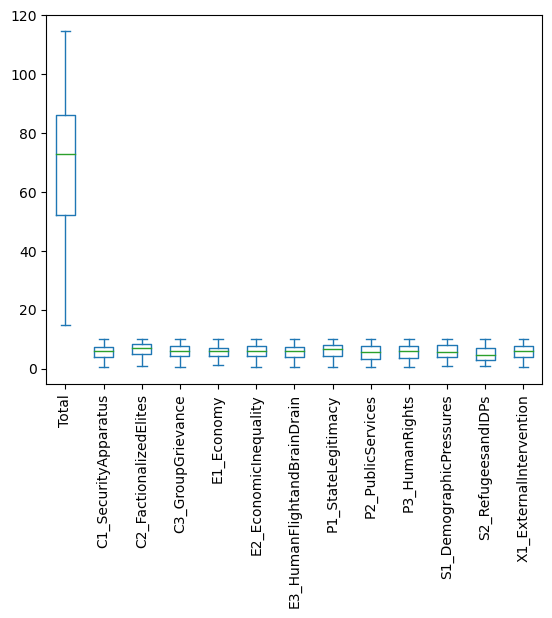

In [189]:
import matplotlib.pyplot as plt

allDFsConcat.iloc[:,2:].plot(kind='box', rot=90)
#plt.semilogy();

### Min-Max Scaling

As you see above, the range of Total is very different from the rest. Let's make sure that this column shares the same range as the others:

In [190]:
columnsToScale=['Total'] # you can add more columns

from sklearn import preprocessing

# prepare the process
minmaxSc = preprocessing.MinMaxScaler(feature_range=(0, 10))# default is 0,1

# apply process
minmaxResult = minmaxSc.fit_transform(allDFsConcat[columnsToScale])

# result
minmaxResult

array([[9.9399239 ],
       [9.73967025],
       [9.64955611],
       ...,
       [0.33776121],
       [0.19758365],
       [0.15753292]])

In [191]:
# new values to new column
allDFsConcat['Total_minMax']=minmaxResult

<Axes: >

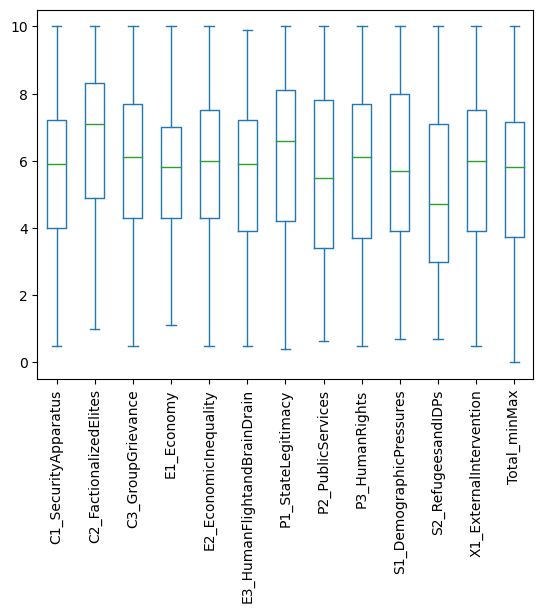

In [192]:
allDFsConcat.iloc[:,3:].plot(kind='box', rot=90)

Another way would be to standardize all these columns:

In [193]:
allDFsConcat.iloc[:,3:-1]

,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,E3_HumanFlightandBrainDrain,P1_StateLegitimacy,P2_PublicServices,P3_HumanRights,S1_DemographicPressures,S2_RefugeesandIDPs,X1_ExternalIntervention
0,9.7,10.0,9.3,9.4,8.4,8.9,9.5,9.8,10.0,9.5,10.0,9.4
1,10.0,9.5,9.4,8.5,8.8,7.1,9.6,9.5,9.8,10.0,10.0,9.7
2,9.8,10.0,10.0,7.8,8.5,8.4,9.6,8.8,9.3,8.8,10.0,10.0
3,9.6,9.8,10.0,8.6,8.9,6.5,9.1,9.8,9.3,8.9,10.0,10.0
4,9.4,9.5,8.8,8.0,8.9,8.0,9.7,9.9,9.8,9.5,9.7,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1.7,1.4,3.7,1.7,1.2,1.3,0.5,1.4,0.9,2.3,2.2,0.5
1599,1.4,1.4,2.6,3.4,2.1,1.6,0.5,1.4,0.5,1.4,1.6,0.5
1600,0.7,1.8,0.5,3.4,1.3,1.9,0.5,1.2,0.5,1.5,1.5,3.2
1601,1.8,1.1,3.3,1.9,1.0,0.8,0.5,1.6,0.5,1.4,2.2,0.5


### Standardization Scaling

In [194]:
# prepare the process
stdSc = preprocessing.StandardScaler()

# apply process
stdScResult = stdSc.fit_transform(allDFsConcat.iloc[:,2:-1])

# result
stdScResult

array([[ 1.88273921,  1.77094368,  1.47214062, ...,  1.54728312,
         2.05688197,  1.50285799],
       [ 1.79905736,  1.9018819 ,  1.26441988, ...,  1.75548016,
         2.05688197,  1.62384168],
       [ 1.76140053,  1.81458975,  1.47214062, ...,  1.25580727,
         2.05688197,  1.74482538],
       ...,
       [-2.12980522, -2.15720303, -1.93447957, ..., -1.78386942,
        -1.48994087, -0.9974717 ],
       [-2.18838251, -1.67709621, -2.22528861, ..., -1.82550883,
        -1.19784958, -2.08632495],
       [-2.20511888, -1.37157369, -2.10065616, ..., -1.70059061,
        -1.48994087, -2.08632495]])

In [195]:
# numpy as pandas
pd.DataFrame(stdScResult)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.882739,1.770944,1.472141,1.543275,1.915299,1.221704,1.634800,1.319195,1.668600,1.711760,1.547283,2.056882,1.502858
1,1.799057,1.901882,1.264420,1.590406,1.451362,1.410163,0.764174,1.357458,1.552445,1.632205,1.755480,2.056882,1.623842
2,1.761401,1.814590,1.472141,1.873191,1.090521,1.268818,1.392960,1.357458,1.281416,1.433318,1.255807,2.056882,1.744825
3,1.744664,1.727298,1.389052,1.873191,1.502910,1.457278,0.473966,1.166142,1.668600,1.433318,1.297447,2.056882,1.744825
4,1.677719,1.640005,1.264420,1.307621,1.193619,1.457278,1.199487,1.395721,1.707318,1.632205,1.547283,1.931700,0.897940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,-2.096332,-1.720742,-2.100656,-1.096050,-2.053944,-2.170565,-2.041176,-2.124487,-1.583745,-1.907994,-1.450754,-1.197850,-2.086325
1599,-2.113069,-1.851681,-2.100656,-1.614489,-1.177617,-1.746531,-1.896072,-2.124487,-1.583745,-2.067104,-1.825509,-1.448214,-2.086325
1600,-2.129805,-2.157203,-1.934480,-2.604236,-1.177617,-2.123450,-1.750967,-2.124487,-1.661182,-2.067104,-1.783869,-1.489941,-0.997472
1601,-2.188383,-1.677096,-2.225289,-1.284574,-1.950846,-2.264795,-2.283017,-2.124487,-1.506309,-2.067104,-1.825509,-1.197850,-2.086325


<Axes: >

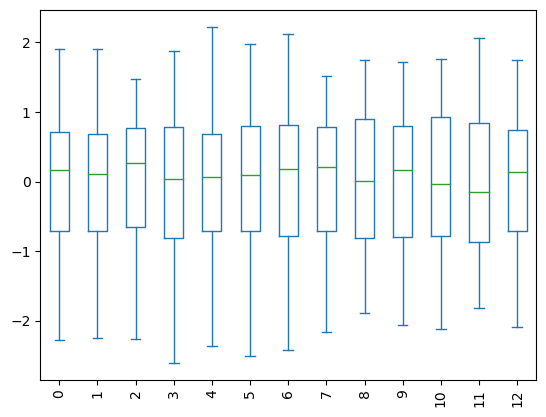

In [196]:
pd.DataFrame(stdScResult).plot(kind='box', rot=90)

we need names for those columns:

In [197]:
newNames_sd=[name+'_sd' for name in allDFsConcat.iloc[:,2:-1].columns]
newNames_sd

['Total_sd',
 'C1_SecurityApparatus_sd',
 'C2_FactionalizedElites_sd',
 'C3_GroupGrievance_sd',
 'E1_Economy_sd',
 'E2_EconomicInequality_sd',
 'E3_HumanFlightandBrainDrain_sd',
 'P1_StateLegitimacy_sd',
 'P2_PublicServices_sd',
 'P3_HumanRights_sd',
 'S1_DemographicPressures_sd',
 'S2_RefugeesandIDPs_sd',
 'X1_ExternalIntervention_sd']

Let me use that array to replace my values in the pandas _Series_:

In [198]:
pd.DataFrame(stdScResult,columns=newNames_sd)

,Total_sd,C1_SecurityApparatus_sd,C2_FactionalizedElites_sd,C3_GroupGrievance_sd,E1_Economy_sd,E2_EconomicInequality_sd,E3_HumanFlightandBrainDrain_sd,P1_StateLegitimacy_sd,P2_PublicServices_sd,P3_HumanRights_sd,S1_DemographicPressures_sd,S2_RefugeesandIDPs_sd,X1_ExternalIntervention_sd
0,1.882739,1.770944,1.472141,1.543275,1.915299,1.221704,1.634800,1.319195,1.668600,1.711760,1.547283,2.056882,1.502858
1,1.799057,1.901882,1.264420,1.590406,1.451362,1.410163,0.764174,1.357458,1.552445,1.632205,1.755480,2.056882,1.623842
2,1.761401,1.814590,1.472141,1.873191,1.090521,1.268818,1.392960,1.357458,1.281416,1.433318,1.255807,2.056882,1.744825
3,1.744664,1.727298,1.389052,1.873191,1.502910,1.457278,0.473966,1.166142,1.668600,1.433318,1.297447,2.056882,1.744825
4,1.677719,1.640005,1.264420,1.307621,1.193619,1.457278,1.199487,1.395721,1.707318,1.632205,1.547283,1.931700,0.897940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,-2.096332,-1.720742,-2.100656,-1.096050,-2.053944,-2.170565,-2.041176,-2.124487,-1.583745,-1.907994,-1.450754,-1.197850,-2.086325
1599,-2.113069,-1.851681,-2.100656,-1.614489,-1.177617,-1.746531,-1.896072,-2.124487,-1.583745,-2.067104,-1.825509,-1.448214,-2.086325
1600,-2.129805,-2.157203,-1.934480,-2.604236,-1.177617,-2.123450,-1.750967,-2.124487,-1.661182,-2.067104,-1.783869,-1.489941,-0.997472
1601,-2.188383,-1.677096,-2.225289,-1.284574,-1.950846,-2.264795,-2.283017,-2.124487,-1.506309,-2.067104,-1.825509,-1.197850,-2.086325


In [199]:
# new data frame
stDF=pd.DataFrame(stdScResult,columns=newNames_sd)

# append to the end (right)
allDFsConcat=pd.concat([allDFsConcat,stDF],axis=1)

Now, these are my new data values:

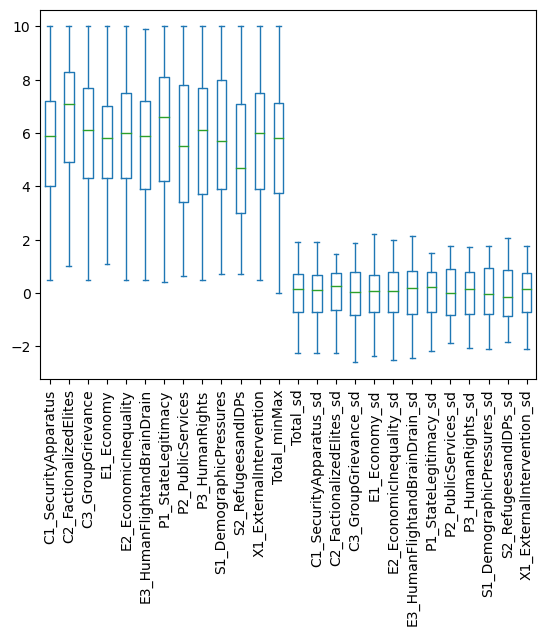

In [200]:
allDFsConcat.iloc[:,3:].plot(kind='box', rot=90);

The new columns have different values:

In [201]:
allDFsConcat.loc[:,['Total','Total_minMax','Total_sd']].head()

,Total,Total_minMax,Total_sd
0,113.9,9.939924,1.882739
1,111.9,9.739670,1.799057
2,111.0,9.649556,1.761401
3,110.6,9.609505,1.744664
4,109.0,9.449302,1.677719


But are prefectly correlated:

In [202]:
# table
allDFsConcat.loc[:,['Total','Total_minMax','Total_sd']].corr()

,Total,Total_minMax,Total_sd
Total,1.0,1.0,1.0
Total_minMax,1.0,1.0,1.0
Total_sd,1.0,1.0,1.0


array([[<Axes: xlabel='Total', ylabel='Total'>,
        <Axes: xlabel='Total_minMax', ylabel='Total'>,
        <Axes: xlabel='Total_sd', ylabel='Total'>],
       [<Axes: xlabel='Total', ylabel='Total_minMax'>,
        <Axes: xlabel='Total_minMax', ylabel='Total_minMax'>,
        <Axes: xlabel='Total_sd', ylabel='Total_minMax'>],
       [<Axes: xlabel='Total', ylabel='Total_sd'>,
        <Axes: xlabel='Total_minMax', ylabel='Total_sd'>,
        <Axes: xlabel='Total_sd', ylabel='Total_sd'>]], dtype=object)

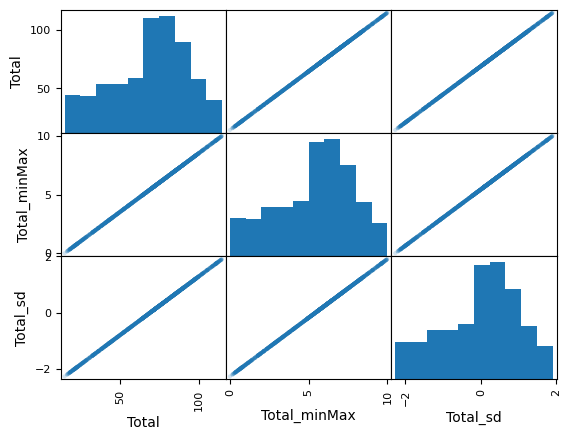

In [203]:
# plot
pd.plotting.scatter_matrix(allDFsConcat.loc[:,['Total','Total_minMax','Total_sd']], alpha=0.2)

Let me save **allDFsConcat**:

In [204]:
allDFsConcat.to_csv(os.path.join("data","allDFsConcat.csv"))

[Home](#home)

______

<a id='merging'></a>

## Merging

Merging data sets need the following considerations:

* Merging is done on two data frames.
* You need columns in each data frame that share the same exact and unique values. The column names or titles need not be the same. In general, it is only one, but a combination of columns is possible.
* The merged table shows by default the mutual coincidences; but you can also request the values not matched, which will help you detect possible extra cleaning.
* Pandas jargon uses a **left** and a **right** data frame: **left**.merge(**right**).

Let me keep the data for 2021 in our fragility data frame:

In [205]:
fragility2021=allDFsConcat[allDFsConcat.Year==2021]
fragility2021.drop(columns='Year',inplace=True)
fragility2021.reset_index(drop=True,inplace=True)
fragility2021.head()

/var/folders/2n/bkfhfqq16r78g3hf7pdj56y40000gn/T/ipykernel_33816/2903067811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fragility2021.drop(columns='Year',inplace=True)


,Country,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,E3_HumanFlightandBrainDrain,P1_StateLegitimacy,P2_PublicServices,...,C3_GroupGrievance_sd,E1_Economy_sd,E2_EconomicInequality_sd,E3_HumanFlightandBrainDrain_sd,P1_StateLegitimacy_sd,P2_PublicServices_sd,P3_HumanRights_sd,S1_DemographicPressures_sd,S2_RefugeesandIDPs_sd,X1_ExternalIntervention_sd
0,YEMEN,111.7,9.4,10.0,9.4,9.8,7.7,6.7,9.9,9.8,...,1.590406,2.121493,0.891900,0.570702,1.472248,1.668600,1.592428,1.672201,1.973427,1.623842
1,SOMALIA,110.9,9.3,10.0,8.3,9.2,9.5,8.8,9.2,9.8,...,1.071967,1.812202,1.739967,1.586432,1.204406,1.668600,1.194653,1.755480,1.723063,1.301218
2,SYRIA,110.7,9.6,9.9,9.7,9.6,7.1,8.2,10.0,9.6,...,1.731798,2.018396,0.609211,1.296224,1.510511,1.591163,1.592428,0.756134,1.931700,1.744825
3,SOUTH SUDAN,109.4,9.7,9.2,8.8,9.2,8.9,6.7,9.5,10.0,...,1.307621,1.812202,1.457278,0.570702,1.319195,1.746037,1.194653,1.547283,2.015155,1.462530
4,CONGO DEMOCRATIC REPUBLIC,108.4,8.6,9.5,9.4,8.5,8.5,6.8,9.2,9.8,...,1.590406,1.451362,1.268818,0.619070,1.204406,1.668600,1.393540,1.672201,2.056882,1.381874


Now, let me bring another data from the web with [country codes](https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes):

In [206]:
# make sure to install 'html5lib', 'beautifulSoup4' and 'lxml'

codesLink='https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes'

allTablesWiki=pd.read_html(codesLink, flavor='bs4')

The object **allTablesWiki** is a list of data frames:

In [207]:
# what and how many
type(allTablesWiki), len(allTablesWiki)

(list, 5)

We have five DFs. Which is the one we need?

In [208]:
# just guessing
allTablesWiki[0]

ISO 3166[1]                              Unnamed: 1_level_0  \
         Country name[5]                       Official state name[6][a]   
0            Afghanistan             The Islamic Republic of Afghanistan   
1          Åland Islands                                           Åland   
2                Albania                         The Republic of Albania   
3                Algeria     The People's Democratic Republic of Algeria   
4         American Samoa                 The Territory of American Samoa   
..                   ...                                             ...   
266    Wallis and Futuna  The Territory of the Wallis and Futuna Islands   
267  Western Sahara [aj]            The Sahrawi Arab Democratic Republic   
268                Yemen                           The Republic of Yemen   
269               Zambia                          The Republic of Zambia   
270             Zimbabwe                        The Republic of Zimbabwe   

      Unnamed: 2_level_0   ISO 3166-1[2]                                  \
    Sovereignty[6][7][8] Alpha-2 code[5] Alpha-3 code[5] Numeric code[5]   
0        UN member state              AF             AFG             004   
1                Finland              AX             ALA             248   
2        UN member state              AL             ALB             008   
3        UN member state              DZ             DZA             012   
4          United States              AS             ASM             016   
..                   ...             ...             ...             ...   
266               France              WF             WLF             876   
267        Disputed [ak]              EH             ESH             732   
268      UN member state              YE             YEM             887   
269      UN member state              ZM             ZMB             894   
270      UN member state              ZW             ZWE             716   

                ISO 3166-2[3] Unnamed: 7_level_0  
    Subdivision code links[3]  Internet ccTLD[9]  
0               ISO 3166-2:AF                .af  
1               ISO 3166-2:AX                .ax  
2               ISO 3166-2:AL                .al  
3               ISO 3166-2:DZ                .dz  
4               ISO 3166-2:AS                .as  
..                        ...                ...  
266             ISO 3166-2:WF                .wf  
267             ISO 3166-2:EH               [al]  
268             ISO 3166-2:YE                .ye  
269             ISO 3166-2:ZM                .zm  
270             ISO 3166-2:ZW                .zw  

[271 rows x 8 columns]

That was the right guess!

Now, let's keep that one:

In [209]:
countryCodes=allTablesWiki[0].copy()

Let's check the column names:

In [210]:
countryCodes.columns

MultiIndex([(       'ISO 3166[1]',           'Country name[5]'),
            ('Unnamed: 1_level_0', 'Official state name[6][a]'),
            ('Unnamed: 2_level_0',      'Sovereignty[6][7][8]'),
            (     'ISO 3166-1[2]',           'Alpha-2 code[5]'),
            (     'ISO 3166-1[2]',           'Alpha-3 code[5]'),
            (     'ISO 3166-1[2]',           'Numeric code[5]'),
            (     'ISO 3166-2[3]', 'Subdivision code links[3]'),
            ('Unnamed: 7_level_0',         'Internet ccTLD[9]')],
           )

Notice they are **MultiIndex**. Let's flatten the columns names:

In [211]:
# option 1
['_'.join(col) for col in countryCodes.columns.values]

['ISO 3166[1]_Country name[5]',
 'Unnamed: 1_level_0_Official state name[6][a]',
 'Unnamed: 2_level_0_Sovereignty[6][7][8]',
 'ISO 3166-1[2]_Alpha-2 code[5]',
 'ISO 3166-1[2]_Alpha-3 code[5]',
 'ISO 3166-1[2]_Numeric code[5]',
 'ISO 3166-2[3]_Subdivision code links[3]',
 'Unnamed: 7_level_0_Internet ccTLD[9]']

In [212]:
# option 2
[col[1] for col in countryCodes.columns.values]

['Country name[5]',
 'Official state name[6][a]',
 'Sovereignty[6][7][8]',
 'Alpha-2 code[5]',
 'Alpha-3 code[5]',
 'Numeric code[5]',
 'Subdivision code links[3]',
 'Internet ccTLD[9]']

In [213]:
#keeping option 2
countryCodes.columns=[col[1] for col in countryCodes.columns.values]
countryCodes.columns

Index(['Country name[5]', 'Official state name[6][a]', 'Sovereignty[6][7][8]',
       'Alpha-2 code[5]', 'Alpha-3 code[5]', 'Numeric code[5]',
       'Subdivision code links[3]', 'Internet ccTLD[9]'],
      dtype='object')

The current names are not nice yet. Let's use some functions to make them look nicer: 

In [214]:
# divide
countryCodes.columns.str.split("[")

Index([             ['Country name', '5]'],
       ['Official state name', '6]', 'a]'],
         ['Sovereignty', '6]', '7]', '8]'],
                    ['Alpha-2 code', '5]'],
                    ['Alpha-3 code', '5]'],
                    ['Numeric code', '5]'],
          ['Subdivision code links', '3]'],
                  ['Internet ccTLD', '9]']],
      dtype='object')

In [215]:
# divide and keep
[element[0] for element in countryCodes.columns.str.split("[")]

['Country name',
 'Official state name',
 'Sovereignty',
 'Alpha-2 code',
 'Alpha-3 code',
 'Numeric code',
 'Subdivision code links',
 'Internet ccTLD']

In [216]:
# divide,  keep and titling
[element[0].title() for element in countryCodes.columns.str.split("[")]

['Country Name',
 'Official State Name',
 'Sovereignty',
 'Alpha-2 Code',
 'Alpha-3 Code',
 'Numeric Code',
 'Subdivision Code Links',
 'Internet Cctld']

In [217]:
# divide,  keep , titling and replace
[element[0].title().replace(" ","") for element in countryCodes.columns.str.split("[")]

['CountryName',
 'OfficialStateName',
 'Sovereignty',
 'Alpha-2Code',
 'Alpha-3Code',
 'NumericCode',
 'SubdivisionCodeLinks',
 'InternetCctld']

In [218]:
# divide,  keep , titling and replace (and more replace)
[element[0].title().replace(" ","").replace("-","") for element in countryCodes.columns.str.split("[")]

['CountryName',
 'OfficialStateName',
 'Sovereignty',
 'Alpha2Code',
 'Alpha3Code',
 'NumericCode',
 'SubdivisionCodeLinks',
 'InternetCctld']

The last version looks good enough. However, this might have been easier using **REGEX**:

In [219]:
countryCodes.columns.str.title().str.replace('\[\w+\]|\s|\-',"",regex=True)

Index(['CountryName', 'OfficialStateName', 'Sovereignty', 'Alpha2Code',
       'Alpha3Code', 'NumericCode', 'SubdivisionCodeLinks', 'InternetCctld'],
      dtype='object')

Let's make the change:

In [220]:
countryCodes.columns=countryCodes.columns.str.title().str.replace('\[\w+\]|\s|\-',"",regex=True)

Let's drop some columns and rename the code columns:

In [221]:
countryCodes.drop(columns=["SubdivisionCodeLinks"],inplace=True)
countryCodes.rename(columns={'Alpha2Code':'iso2','Alpha3Code':'iso3','InternetCctld':'internet'},inplace=True)
countryCodes.head()

,CountryName,OfficialStateName,Sovereignty,iso2,iso3,NumericCode,internet
0,Afghanistan,The Islamic Republic of Afghanistan,UN member state,AF,AFG,004,.af
1,Åland Islands,Åland,Finland,AX,ALA,248,.ax
2,Albania,The Republic of Albania,UN member state,AL,ALB,008,.al
3,Algeria,The People's Democratic Republic of Algeria,UN member state,DZ,DZA,012,.dz
4,American Samoa,The Territory of American Samoa,United States,AS,ASM,016,.as


Let me create a new column, but without accents and with country names in upper case:

In [222]:
# bye accents
countryCodes['Country']=countryCodes['CountryName'].str.normalize('NFKD').\
                        str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()

Let's see the current situation:

In [223]:
countryCodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CountryName        271 non-null    object
 1   OfficialStateName  271 non-null    object
 2   Sovereignty        271 non-null    object
 3   iso2               270 non-null    object
 4   iso3               271 non-null    object
 5   NumericCode        271 non-null    object
 6   internet           271 non-null    object
 7   Country            271 non-null    object
dtypes: object(8)
memory usage: 17.1+ KB


There is a row with missing values in iso2:

In [224]:
countryCodes[countryCodes.isna().any(axis=1)]

,CountryName,OfficialStateName,Sovereignty,iso2,iso3,NumericCode,internet,Country
165,Namibia,The Republic of Namibia,UN member state,NaN,NAM,516,.na,NAMIBIA


Pandas interpreted the iso2 of a country as a missing value:

In [225]:
countryCodes.loc[countryCodes.Country=='NAMIBIA','iso2']

165    NaN
Name: iso2, dtype: object

In [226]:
# easy fix
countryCodes.loc[countryCodes.Country=='NAMIBIA','iso2']="NA"

# something missing?
countryCodes[countryCodes.isna().any(axis=1)]

,CountryName,OfficialStateName,Sovereignty,iso2,iso3,NumericCode,internet,Country


We could verify the amount of characters in iso2:

In [227]:
# are these iso2 valid values?
[x for x in countryCodes.iso2 if len(x)>2]

['British Virgin Islands – See Virgin Islands (British).',
 'Burma – See Myanmar.',
 'Cape Verde – See Cabo Verde.',
 'Caribbean Netherlands – See Bonaire, Sint Eustatius and Saba.',
 'China, The Republic of – See Taiwan (Province of China).',
 "Democratic People's Republic of Korea – See Korea, The Democratic People's Republic of.",
 'Democratic Republic of the Congo – See Congo, The Democratic Republic of the.',
 'East Timor – See Timor-Leste.',
 'Great Britain – See United Kingdom, The.',
 "Ivory Coast – See Côte d'Ivoire.",
 'Jan Mayen – See Svalbard and Jan Mayen.',
 "North Korea – See Korea, The Democratic People's Republic of.",
 "People's Republic of China – See China.",
 'Republic of China – See Taiwan (Province of China).',
 'Republic of Korea – See Korea, The Republic of.',
 'Republic of the Congo – See Congo, The.',
 'Saba – See Bonaire, Sint Eustatius and Saba.',
 'Sahrawi Arab Democratic Republic – See Western Sahara.',
 'Sint Eustatius – See Bonaire, Sint Eustatius and S

That should not be possible. Let's check those rows:

In [228]:
badValues=[x for x in countryCodes.iso2 if len(x)>2]

countryCodes[countryCodes.iso2.isin(badValues)]

,CountryName,OfficialStateName,Sovereignty,iso2,iso3,NumericCode,internet,Country
33,British Virgin Islands – See Virgin Islands (B...,British Virgin Islands – See Virgin Islands (B...,British Virgin Islands – See Virgin Islands (B...,British Virgin Islands – See Virgin Islands (B...,British Virgin Islands – See Virgin Islands (B...,British Virgin Islands – See Virgin Islands (B...,British Virgin Islands – See Virgin Islands (B...,BRITISH VIRGIN ISLANDS SEE VIRGIN ISLANDS (BR...
37,Burma – See Myanmar.,Burma – See Myanmar.,Burma – See Myanmar.,Burma – See Myanmar.,Burma – See Myanmar.,Burma – See Myanmar.,Burma – See Myanmar.,BURMA SEE MYANMAR.
43,Cape Verde – See Cabo Verde.,Cape Verde – See Cabo Verde.,Cape Verde – See Cabo Verde.,Cape Verde – See Cabo Verde.,Cape Verde – See Cabo Verde.,Cape Verde – See Cabo Verde.,Cape Verde – See Cabo Verde.,CAPE VERDE SEE CABO VERDE.
44,"Caribbean Netherlands – See Bonaire, Sint Eust...","Caribbean Netherlands – See Bonaire, Sint Eust...","Caribbean Netherlands – See Bonaire, Sint Eust...","Caribbean Netherlands – See Bonaire, Sint Eust...","Caribbean Netherlands – See Bonaire, Sint Eust...","Caribbean Netherlands – See Bonaire, Sint Eust...","Caribbean Netherlands – See Bonaire, Sint Eust...","CARIBBEAN NETHERLANDS SEE BONAIRE, SINT EUSTA..."
50,"China, The Republic of – See Taiwan (Province ...","China, The Republic of – See Taiwan (Province ...","China, The Republic of – See Taiwan (Province ...","China, The Republic of – See Taiwan (Province ...","China, The Republic of – See Taiwan (Province ...","China, The Republic of – See Taiwan (Province ...","China, The Republic of – See Taiwan (Province ...","CHINA, THE REPUBLIC OF SEE TAIWAN (PROVINCE O..."
65,Democratic People's Republic of Korea – See Ko...,Democratic People's Republic of Korea – See Ko...,Democratic People's Republic of Korea – See Ko...,Democratic People's Republic of Korea – See Ko...,Democratic People's Republic of Korea – See Ko...,Democratic People's Republic of Korea – See Ko...,Democratic People's Republic of Korea – See Ko...,DEMOCRATIC PEOPLE'S REPUBLIC OF KOREA SEE KOR...
66,"Democratic Republic of the Congo – See Congo, ...","Democratic Republic of the Congo – See Congo, ...","Democratic Republic of the Congo – See Congo, ...","Democratic Republic of the Congo – See Congo, ...","Democratic Republic of the Congo – See Congo, ...","Democratic Republic of the Congo – See Congo, ...","Democratic Republic of the Congo – See Congo, ...","DEMOCRATIC REPUBLIC OF THE CONGO SEE CONGO, T..."
71,East Timor – See Timor-Leste.,East Timor – See Timor-Leste.,East Timor – See Timor-Leste.,East Timor – See Timor-Leste.,East Timor – See Timor-Leste.,East Timor – See Timor-Leste.,East Timor – See Timor-Leste.,EAST TIMOR SEE TIMOR-LESTE.
94,"Great Britain – See United Kingdom, The.","Great Britain – See United Kingdom, The.","Great Britain – See United Kingdom, The.","Great Britain – See United Kingdom, The.","Great Britain – See United Kingdom, The.","Great Britain – See United Kingdom, The.","Great Britain – See United Kingdom, The.","GREAT BRITAIN SEE UNITED KINGDOM, THE."
120,Ivory Coast – See Côte d'Ivoire.,Ivory Coast – See Côte d'Ivoire.,Ivory Coast – See Côte d'Ivoire.,Ivory Coast – See Côte d'Ivoire.,Ivory Coast – See Côte d'Ivoire.,Ivory Coast – See Côte d'Ivoire.,Ivory Coast – See Côte d'Ivoire.,IVORY COAST SEE COTE D'IVOIRE.


Let's get rid of those rows:

In [229]:
countryCodes=countryCodes[~countryCodes.iso2.isin(badValues)] # filtering

countryCodes.reset_index(drop=True,inplace=True) # needed when rows are dropped

We can continue with merging. But before that, keep these numbers in mind:

In [230]:
fragility2021.shape,countryCodes.shape

((179, 28), (249, 8))

Let me show you some merge approaches, but I will only show the amount of columns produced:

1. You keep only what is common in both key columns:

This is the default. The final rows will be the ones where the key values in each data frame match exactly. In this case, your count of rows will be at most the amount of rows of the smallest data frame.

In [231]:
# how many resulting rows after inner merging
fragility2021.merge(countryCodes,how='inner',left_on='Country',right_on='Country').shape

(138, 35)

2. You keep all the keys from one data frame:

The final rows will be all the rows from the dataframe (here from the _left_). If a key values does not find a match, the key value is kept, but the columns will have missing values. In this case, your count of rows will be equal to the amount of rows of the data frame to the left. You can also use **right** so the same logic applies to the data frame to the right.



In [232]:
# how many resulting rows after left merging
fragility2021.merge(countryCodes,how='left',left_on='Country',right_on='Country').shape

(179, 35)

3. You keep all the rows from both data frames:

In this case you will obtain all possible rows: the matched values, and the unmatched values from both data frames. You will also generate missing values. In this case, your count of rows will be at least the amount of rows of the data frame with the most rows.


In [233]:
# how many resulting rows after outer merging
fragility2021.merge(countryCodes,how='outer',left_on='Country',right_on='Country').shape

(290, 35)

Let's keep the **inner** merge on the CIA data files this time:

In [234]:
# the default is inner merge
fragility2021_iso=fragility2021.merge(countryCodes) # notice less argument
fragility2021_iso

,Country,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,E3_HumanFlightandBrainDrain,P1_StateLegitimacy,P2_PublicServices,...,S1_DemographicPressures_sd,S2_RefugeesandIDPs_sd,X1_ExternalIntervention_sd,CountryName,OfficialStateName,Sovereignty,iso2,iso3,NumericCode,internet
0,YEMEN,111.7,9.4,10.0,9.4,9.8,7.7,6.7,9.9,9.8,...,1.672201,1.973427,1.623842,Yemen,The Republic of Yemen,UN member state,YE,YEM,887,.ye
1,SOMALIA,110.9,9.3,10.0,8.3,9.2,9.5,8.8,9.2,9.8,...,1.755480,1.723063,1.301218,Somalia,The Federal Republic of Somalia,UN member state,SO,SOM,706,.so
2,SOUTH SUDAN,109.4,9.7,9.2,8.8,9.2,8.9,6.7,9.5,10.0,...,1.547283,2.015155,1.462530,South Sudan,The Republic of South Sudan,UN member state,SS,SSD,728,.ss
3,CHAD,105.8,8.9,9.5,8.0,8.6,8.7,7.9,9.4,9.8,...,1.588923,1.764791,0.897940,Chad,The Republic of Chad,UN member state,TD,TCD,148,.td
4,AFGHANISTAN,102.1,10.0,8.6,7.2,9.2,8.1,7.0,8.7,9.8,...,1.339086,1.556154,1.059251,Afghanistan,The Islamic Republic of Afghanistan,UN member state,AF,AFG,004,.af
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,DENMARK,18.8,1.7,1.4,3.7,1.7,1.2,1.3,0.5,1.4,...,-1.450754,-1.197850,-2.086325,Denmark,The Kingdom of Denmark,UN member state,DK,DNK,208,.dk
134,NEW ZEALAND,18.4,1.4,1.4,2.6,3.4,2.1,1.6,0.5,1.4,...,-1.825509,-1.448214,-2.086325,New Zealand,New Zealand,UN member state,NZ,NZL,554,.nz
135,ICELAND,18.0,0.7,1.8,0.5,3.4,1.3,1.9,0.5,1.2,...,-1.783869,-1.489941,-0.997472,Iceland,Iceland,UN member state,IS,ISL,352,.is
136,NORWAY,16.6,1.8,1.1,3.3,1.9,1.0,0.8,0.5,1.6,...,-1.825509,-1.197850,-2.086325,Norway,The Kingdom of Norway,UN member state,NO,NOR,578,.no


### Fuzzy Merge

Merging is done. 

Can we improve it?

We use fuzzy merging when we know that we could improve merge by changing the values in the key column so that more rows are matched. However, the algorithm can get confused if we have **noise** in the data. Let's look for noise:

Let's pay attention to the **Sovereignty** column:

In [235]:
# maybe there are repeated countries because some territories are beyond their borders..?
countryCodes.Sovereignty.value_counts()

Sovereignty
UN member state      193
United Kingdom        12
France                12
United States          6
Netherlands            4
Australia              4
New Zealand            3
British Crown          3
Norway                 2
Denmark                2
UN observer state      2
China                  2
Finland                1
Antarctic Treaty       1
Disputed [aa]          1
Disputed [ak]          1
Name: count, dtype: int64

Do we have duplicates in column names?

In [236]:
len(pd.unique(countryCodes.Country)),len(countryCodes.Country)

(249, 249)

In [237]:
countryCodes[countryCodes.Country.str.contains('UNITED|FRANCE|NETHER|AUSTRALIA|CHINA')]

,CountryName,OfficialStateName,Sovereignty,iso2,iso3,NumericCode,internet,Country
13,Australia [c],The Commonwealth of Australia,UN member state,AU,AUS,036,.au,AUSTRALIA [C]
45,China,The People's Republic of China,UN member state,CN,CHN,156,.cn,CHINA
76,France [m],The French Republic,UN member state,FR,FRA,250,.fr,FRANCE [M]
157,"Netherlands, Kingdom of the",The Kingdom of the Netherlands,UN member state,NL,NLD,528,.nl,"NETHERLANDS, KINGDOM OF THE"
217,Taiwan (Province of China) [z],The Republic of China,Disputed [aa],TW,TWN,158,.tw,TAIWAN (PROVINCE OF CHINA) [Z]
219,"Tanzania, the United Republic of",The United Republic of Tanzania,UN member state,TZ,TZA,834,.tz,"TANZANIA, THE UNITED REPUBLIC OF"
233,United Arab Emirates (the),The United Arab Emirates,UN member state,AE,ARE,784,.ae,UNITED ARAB EMIRATES (THE)
234,United Kingdom of Great Britain and Northern I...,The United Kingdom of Great Britain and Northe...,UN member state,GB,GBR,826,.gb .uk [ad],UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...
235,United States Minor Outlying Islands (the) [ae],"Baker Island, Howland Island, Jarvis Island, J...",United States,UM,UMI,581,[af],UNITED STATES MINOR OUTLYING ISLANDS (THE) [AE]
236,United States of America (the),The United States of America,UN member state,US,USA,840,.us,UNITED STATES OF AMERICA (THE)


Notice that we will look for **similarities**, so let's solve the USA case.

In [238]:
countryCodes.loc[236,'Country']

'UNITED STATES OF AMERICA (THE)'

In [239]:
fragility2021[fragility2021.Country.str.contains('UNITED STATES')]

,Country,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,E3_HumanFlightandBrainDrain,P1_StateLegitimacy,P2_PublicServices,...,C3_GroupGrievance_sd,E1_Economy_sd,E2_EconomicInequality_sd,E3_HumanFlightandBrainDrain_sd,P1_StateLegitimacy_sd,P2_PublicServices_sd,P3_HumanRights_sd,S1_DemographicPressures_sd,S2_RefugeesandIDPs_sd,X1_ExternalIntervention_sd
142,UNITED STATES,44.6,4.3,7.3,6.5,2.1,3.7,1.8,3.5,2.7,...,0.223612,-1.847749,-0.992694,-1.799335,-0.976593,-1.080406,-0.515781,-0.32649,-1.156122,-1.884685


In [240]:
#then
countryCodes.loc[236,'Country']='UNITED STATES'

Let's find what are the country names that are not shared between those DFs:

In [241]:
# Countries in 'countryCodes' but NOT in 'fragility2021' 
OnlyCodes=set(countryCodes.Country)-set(fragility2021.Country)
OnlyCodes

{'ALAND ISLANDS',
 'AMERICAN SAMOA',
 'ANDORRA',
 'ANGUILLA',
 'ANTARCTICA [B]',
 'ARUBA',
 'AUSTRALIA [C]',
 'BAHAMAS (THE)',
 'BERMUDA',
 'BOLIVIA (PLURINATIONAL STATE OF)',
 'BONAIRE  SINT EUSTATIUS  SABA',
 'BOUVET ISLAND',
 'BRITISH INDIAN OCEAN TERRITORY (THE)',
 'BRUNEI DARUSSALAM [F]',
 'CABO VERDE [G]',
 'CAYMAN ISLANDS (THE)',
 'CENTRAL AFRICAN REPUBLIC (THE)',
 'CHRISTMAS ISLAND',
 'COCOS (KEELING) ISLANDS (THE)',
 'COMOROS (THE)',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
 'CONGO (THE) [H]',
 'COOK ISLANDS (THE)',
 "COTE D'IVOIRE [I]",
 'CURACAO',
 'CZECHIA [J]',
 'DOMINICA',
 'DOMINICAN REPUBLIC (THE)',
 'ESWATINI [K]',
 'FALKLAND ISLANDS (THE) [MALVINAS] [L]',
 'FAROE ISLANDS (THE)',
 'FRANCE [M]',
 'FRENCH GUIANA',
 'FRENCH POLYNESIA',
 'FRENCH SOUTHERN TERRITORIES (THE) [N]',
 'GAMBIA (THE)',
 'GIBRALTAR',
 'GREENLAND',
 'GUADELOUPE',
 'GUAM',
 'GUERNSEY',
 'GUINEA-BISSAU',
 'HEARD ISLAND AND MCDONALD ISLANDS',
 'HOLY SEE (THE) [O]',
 'HONG KONG',
 'IRAN (ISLAMIC REPUB

In [242]:
# Countries in 'fragility2021'  but NOT in 'countryCodes'
OnlyFragility=set(fragility2021.Country)-set(countryCodes.Country)
OnlyFragility

{'AUSTRALIA',
 'BAHAMAS',
 'BOLIVIA',
 'BRUNEI DARUSSALAM',
 'CAPE VERDE',
 'CENTRAL AFRICAN REPUBLIC',
 'COMOROS',
 'CONGO DEMOCRATIC REPUBLIC',
 'CONGO REPUBLIC',
 "COTE D'IVOIRE",
 'CZECH REPUBLIC',
 'DOMINICAN REPUBLIC',
 'ESWATINI',
 'FRANCE',
 'GAMBIA',
 'GUINEA BISSAU',
 'IRAN',
 'KYRGYZ REPUBLIC',
 'LAOS',
 'MACEDONIA',
 'MICRONESIA',
 'MOLDOVA',
 'MYANMAR',
 'NETHERLANDS',
 'NIGER',
 'NORTH KOREA',
 'PALESTINE',
 'PHILIPPINES',
 'RUSSIA',
 'SLOVAK REPUBLIC',
 'SOUTH KOREA',
 'SUDAN',
 'SYRIA',
 'TANZANIA',
 'TIMOR-LESTE',
 'TURKEY',
 'UNITED ARAB EMIRATES',
 'UNITED KINGDOM',
 'VENEZUELA',
 'VIETNAM'}

Here, we should try to find what countries in _OnlyFragility_ may match the ones in _OnlyCodes_. 

We need to use the **fuzzy merge** approach (please install **thefuzz** if not previously installed):

In [243]:
from thefuzz import process as fz

# take a country from OnlyFragility
# look for a country in OnlyCodes and return the most similar
[(f,fz.extractOne(f, OnlyCodes)) for f in sorted(OnlyFragility)]

[('AUSTRALIA', ('AUSTRALIA [C]', 95)),
 ('BAHAMAS', ('BAHAMAS (THE)', 90)),
 ('BOLIVIA', ('BOLIVIA (PLURINATIONAL STATE OF)', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI DARUSSALAM [F]', 95)),
 ('CAPE VERDE', ('CABO VERDE [G]', 70)),
 ('CENTRAL AFRICAN REPUBLIC', ('CENTRAL AFRICAN REPUBLIC (THE)', 95)),
 ('COMOROS', ('COMOROS (THE)', 90)),
 ('CONGO DEMOCRATIC REPUBLIC', ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)', 95)),
 ('CONGO REPUBLIC', ('KOREA (THE REPUBLIC OF) [Q]', 86)),
 ("COTE D'IVOIRE", ("COTE D'IVOIRE [I]", 95)),
 ('CZECH REPUBLIC', ('KOREA (THE REPUBLIC OF) [Q]', 86)),
 ('DOMINICAN REPUBLIC', ('DOMINICAN REPUBLIC (THE)', 95)),
 ('ESWATINI', ('ESWATINI [K]', 95)),
 ('FRANCE', ('FRANCE [M]', 90)),
 ('GAMBIA', ('GAMBIA (THE)', 90)),
 ('GUINEA BISSAU', ('GUINEA-BISSAU', 100)),
 ('IRAN', ('IRAN (ISLAMIC REPUBLIC OF)', 90)),
 ('KYRGYZ REPUBLIC', ('KOREA (THE REPUBLIC OF) [Q]', 86)),
 ('LAOS', ('MACAO [S]', 64)),
 ('MACEDONIA', ('NORTH MACEDONIA [T]', 90)),
 ('MICRONESIA', ('MICRONESIA (FE

Above you have found _some_ good matches. Let's keep the best ones:

In [244]:
[(f,fz.extractOne(f, OnlyCodes)) for f in sorted(OnlyFragility)
 if fz.extractOne(f, OnlyCodes)[1]>=90]

[('AUSTRALIA', ('AUSTRALIA [C]', 95)),
 ('BAHAMAS', ('BAHAMAS (THE)', 90)),
 ('BOLIVIA', ('BOLIVIA (PLURINATIONAL STATE OF)', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI DARUSSALAM [F]', 95)),
 ('CENTRAL AFRICAN REPUBLIC', ('CENTRAL AFRICAN REPUBLIC (THE)', 95)),
 ('COMOROS', ('COMOROS (THE)', 90)),
 ('CONGO DEMOCRATIC REPUBLIC', ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)', 95)),
 ("COTE D'IVOIRE", ("COTE D'IVOIRE [I]", 95)),
 ('DOMINICAN REPUBLIC', ('DOMINICAN REPUBLIC (THE)', 95)),
 ('ESWATINI', ('ESWATINI [K]', 95)),
 ('FRANCE', ('FRANCE [M]', 90)),
 ('GAMBIA', ('GAMBIA (THE)', 90)),
 ('GUINEA BISSAU', ('GUINEA-BISSAU', 100)),
 ('IRAN', ('IRAN (ISLAMIC REPUBLIC OF)', 90)),
 ('MACEDONIA', ('NORTH MACEDONIA [T]', 90)),
 ('MICRONESIA', ('MICRONESIA (FEDERATED STATES OF)', 90)),
 ('MOLDOVA', ('MOLDOVA (THE REPUBLIC OF)', 90)),
 ('MYANMAR', ('MYANMAR [U]', 95)),
 ('NETHERLANDS', ('NETHERLANDS, KINGDOM OF THE', 90)),
 ('NIGER', ('NIGER (THE)', 90)),
 ('PALESTINE', ('PALESTINE, STATE OF', 90)),
 (

Once you have good matches, you have to create a dictionary like this:

In [245]:
changesCodes1={fz.extractOne(f, OnlyCodes)[0]:f 
                 for f in sorted(OnlyFragility)
                 if fz.extractOne(f, OnlyCodes)[1] >=90}
#dict of matches
changesCodes1

{'AUSTRALIA [C]': 'AUSTRALIA',
 'BAHAMAS (THE)': 'BAHAMAS',
 'BOLIVIA (PLURINATIONAL STATE OF)': 'BOLIVIA',
 'BRUNEI DARUSSALAM [F]': 'BRUNEI DARUSSALAM',
 'CENTRAL AFRICAN REPUBLIC (THE)': 'CENTRAL AFRICAN REPUBLIC',
 'COMOROS (THE)': 'COMOROS',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)': 'CONGO DEMOCRATIC REPUBLIC',
 "COTE D'IVOIRE [I]": "COTE D'IVOIRE",
 'DOMINICAN REPUBLIC (THE)': 'DOMINICAN REPUBLIC',
 'ESWATINI [K]': 'ESWATINI',
 'FRANCE [M]': 'FRANCE',
 'GAMBIA (THE)': 'GAMBIA',
 'GUINEA-BISSAU': 'GUINEA BISSAU',
 'IRAN (ISLAMIC REPUBLIC OF)': 'IRAN',
 'NORTH MACEDONIA [T]': 'MACEDONIA',
 'MICRONESIA (FEDERATED STATES OF)': 'MICRONESIA',
 'MOLDOVA (THE REPUBLIC OF)': 'MOLDOVA',
 'MYANMAR [U]': 'MYANMAR',
 'NETHERLANDS, KINGDOM OF THE': 'NETHERLANDS',
 'NIGER (THE)': 'NIGER',
 'PALESTINE, STATE OF': 'PALESTINE',
 'PHILIPPINES (THE)': 'PHILIPPINES',
 'RUSSIAN FEDERATION (THE) [W]': 'RUSSIA',
 'SUDAN (THE)': 'SUDAN',
 'SYRIAN ARAB REPUBLIC (THE) [Y]': 'SYRIA',
 'TANZANIA, THE UNITED

You can use that dict for the replacements in *countryCodes*:

In [246]:
countryCodes.Country.replace(to_replace=changesCodes1,inplace=True)


This process can be done a few more times, and you can recover more rows for the merging process. Let's see:

In [247]:
# second try
OnlyCodes=set(countryCodes.Country)-set(fragility2021.Country)
OnlyFragility=set(fragility2021.Country)-set(countryCodes.Country)
[(f,fz.extractOne(f, OnlyCodes)) for f in sorted(OnlyFragility)]

[('CAPE VERDE', ('CABO VERDE [G]', 70)),
 ('CONGO REPUBLIC', ('KOREA (THE REPUBLIC OF) [Q]', 86)),
 ('CZECH REPUBLIC', ('KOREA (THE REPUBLIC OF) [Q]', 86)),
 ('KYRGYZ REPUBLIC', ('KOREA (THE REPUBLIC OF) [Q]', 86)),
 ('LAOS', ('MACAO [S]', 64)),
 ('NORTH KOREA', ('KOREA (THE REPUBLIC OF) [Q]', 86)),
 ('SLOVAK REPUBLIC', ('KOREA (THE REPUBLIC OF) [Q]', 86)),
 ('SOUTH KOREA', ('KOREA (THE REPUBLIC OF) [Q]', 86)),
 ('TURKEY', ('TURKIYE [AC]', 75)),
 ('VIETNAM', ('VIET NAM [AG]', 77))]

We might need some manual changes:

In [248]:
countryCodes[countryCodes.Country.str.contains('LAO|KOREA|CZECH',regex=True)]

,CountryName,OfficialStateName,Sovereignty,iso2,iso3,NumericCode,internet,Country
59,Czechia [j],The Czech Republic,UN member state,CZ,CZE,203,.cz,CZECHIA [J]
118,Korea (the Democratic People's Republic of) [p],The Democratic People's Republic of Korea,UN member state,KP,PRK,408,.kp,KOREA (THE DEMOCRATIC PEOPLE'S REPUBLIC OF) [P]
119,Korea (the Republic of) [q],The Republic of Korea,UN member state,KR,KOR,410,.kr,KOREA (THE REPUBLIC OF) [Q]
122,Lao People's Democratic Republic (the) [r],The Lao People's Democratic Republic,UN member state,LA,LAO,418,.la,LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE) [R]


The presence of repetitive strings confuses the fuzzy algorithm. Then, we could get rid of those:

In [249]:
# solving manually KOREA:
countryCodes.loc[118,'Country']='NORTH KOREA'
countryCodes.loc[119,'Country']='SOUTH KOREA'
countryCodes.loc[122,'Country']='LAOS'
countryCodes.loc[59,'Country']='CZECH REPUBLIC'

In [250]:
# again
OnlyCodes=set(countryCodes.Country)-set(fragility2021.Country)
OnlyFragility=set(fragility2021.Country)-set(countryCodes.Country)
[(f,fz.extractOne(f, OnlyCodes)) for f in sorted(OnlyFragility)]

[('CAPE VERDE', ('CABO VERDE [G]', 70)),
 ('CONGO REPUBLIC', ('CONGO (THE) [H]', 59)),
 ('KYRGYZ REPUBLIC', ('KYRGYZSTAN', 54)),
 ('SLOVAK REPUBLIC', ('SLOVAKIA', 74)),
 ('TURKEY', ('TURKIYE [AC]', 75)),
 ('VIETNAM', ('VIET NAM [AG]', 77))]

In [251]:
# second dict of changes
changesCodes2={fz.extractOne(f, OnlyCodes)[0]:f 
                 for f in sorted(OnlyFragility)
                 if fz.extractOne(f, OnlyCodes)[1] >=52}
#dict of matches
changesCodes2

{'CABO VERDE [G]': 'CAPE VERDE',
 'CONGO (THE) [H]': 'CONGO REPUBLIC',
 'KYRGYZSTAN': 'KYRGYZ REPUBLIC',
 'SLOVAKIA': 'SLOVAK REPUBLIC',
 'TURKIYE [AC]': 'TURKEY',
 'VIET NAM [AG]': 'VIETNAM'}

In [252]:
# make the changes
countryCodes.Country.replace(to_replace=changesCodes2,inplace=True)

In [253]:
# last try?
OnlyCodes=set(countryCodes.Country)-set(fragility2021.Country)
OnlyFragility=set(fragility2021.Country)-set(countryCodes.Country)
[(f,fz.extractOne(f, OnlyCodes)) for f in sorted(OnlyFragility)]

[]

We are ready for the merge:

In [254]:
fragility2021_iso=fragility2021.merge(countryCodes) #merge on Country
fragility2021_iso

,Country,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,E3_HumanFlightandBrainDrain,P1_StateLegitimacy,P2_PublicServices,...,S1_DemographicPressures_sd,S2_RefugeesandIDPs_sd,X1_ExternalIntervention_sd,CountryName,OfficialStateName,Sovereignty,iso2,iso3,NumericCode,internet
0,YEMEN,111.7,9.4,10.0,9.4,9.8,7.7,6.7,9.9,9.8,...,1.672201,1.973427,1.623842,Yemen,The Republic of Yemen,UN member state,YE,YEM,887,.ye
1,SOMALIA,110.9,9.3,10.0,8.3,9.2,9.5,8.8,9.2,9.8,...,1.755480,1.723063,1.301218,Somalia,The Federal Republic of Somalia,UN member state,SO,SOM,706,.so
2,SYRIA,110.7,9.6,9.9,9.7,9.6,7.1,8.2,10.0,9.6,...,0.756134,1.931700,1.744825,Syrian Arab Republic (the) [y],The Syrian Arab Republic,UN member state,SY,SYR,760,.sy
3,SOUTH SUDAN,109.4,9.7,9.2,8.8,9.2,8.9,6.7,9.5,10.0,...,1.547283,2.015155,1.462530,South Sudan,The Republic of South Sudan,UN member state,SS,SSD,728,.ss
4,CONGO DEMOCRATIC REPUBLIC,108.4,8.6,9.5,9.4,8.5,8.5,6.8,9.2,9.8,...,1.672201,2.056882,1.381874,Congo (the Democratic Republic of the),The Democratic Republic of the Congo,UN member state,CD,COD,180,.cd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,DENMARK,18.8,1.7,1.4,3.7,1.7,1.2,1.3,0.5,1.4,...,-1.450754,-1.197850,-2.086325,Denmark,The Kingdom of Denmark,UN member state,DK,DNK,208,.dk
175,NEW ZEALAND,18.4,1.4,1.4,2.6,3.4,2.1,1.6,0.5,1.4,...,-1.825509,-1.448214,-2.086325,New Zealand,New Zealand,UN member state,NZ,NZL,554,.nz
176,ICELAND,18.0,0.7,1.8,0.5,3.4,1.3,1.9,0.5,1.2,...,-1.783869,-1.489941,-0.997472,Iceland,Iceland,UN member state,IS,ISL,352,.is
177,NORWAY,16.6,1.8,1.1,3.3,1.9,1.0,0.8,0.5,1.6,...,-1.825509,-1.197850,-2.086325,Norway,The Kingdom of Norway,UN member state,NO,NOR,578,.no


We have recovered all the rows to match the amount of rows in *fragility2021*!

In [255]:
#checking:
fragility2021_iso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         179 non-null    object 
 1   Total                           179 non-null    float64
 2   C1_SecurityApparatus            179 non-null    float64
 3   C2_FactionalizedElites          179 non-null    float64
 4   C3_GroupGrievance               179 non-null    float64
 5   E1_Economy                      179 non-null    float64
 6   E2_EconomicInequality           179 non-null    float64
 7   E3_HumanFlightandBrainDrain     179 non-null    float64
 8   P1_StateLegitimacy              179 non-null    float64
 9   P2_PublicServices               179 non-null    float64
 10  P3_HumanRights                  179 non-null    float64
 11  S1_DemographicPressures         179 non-null    float64
 12  S2_RefugeesandIDPs              179 

### Geo Merging

Let me fetch a world map from this 
[website](https://public.opendatasoft.com/explore/dataset/world-administrative-boundaries/export/). Download the **geojson** format and save it your *maps* folder.

In [256]:
import geopandas as gpd
import os

world=gpd.read_file(os.path.join("maps","world-administrative-boundaries.geojson"))

In [257]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   geo_point_2d              256 non-null    object  
 1   iso3                      238 non-null    object  
 2   status                    255 non-null    object  
 3   color_code                255 non-null    object  
 4   name                      256 non-null    object  
 5   continent                 256 non-null    object  
 6   region                    252 non-null    object  
 7   iso_3166_1_alpha_2_codes  236 non-null    object  
 8   french_short              256 non-null    object  
 9   geometry                  256 non-null    geometry
dtypes: geometry(1), object(9)
memory usage: 20.1+ KB


<Axes: >

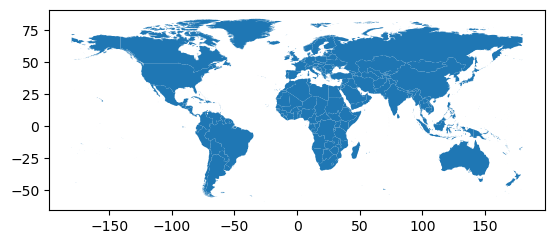

In [258]:
# our file
world.plot()

In [259]:
# the crs info
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [260]:
# any missing?
world[world.isna().any(axis=1)]

,geo_point_2d,iso3,status,color_code,name,continent,region,iso_3166_1_alpha_2_codes,french_short,geometry
4,"{'lon': -36.38236149455586, 'lat': -54.4881509...",NaN,UK Territory,GBR,South Georgia & the South Sandwich Islands,Antarctica,NaN,NaN,South Georgia & the South Sandwich Islands,"MULTIPOLYGON (((-26.24361 -58.49473, -26.24889..."
9,"{'lon': 75.80767732353854, 'lat': 34.550676304...",NaN,Sovereignty unsettled,XXZ,Jammu-Kashmir,Asia,Eastern Asia,NaN,Jammu-Kashmir,"POLYGON ((77.88883 35.44156, 77.91205 35.43726..."
10,"{'lon': 73.49837379726881, 'lat': -53.09133257...",HMD,AU Territory,AUS,Heard Island and McDonald Islands,Antarctica,NaN,HM,Heard Island and McDonald Islands,"POLYGON ((73.43416 -53.02972, 73.44444 -53.030..."
15,"{'lon': 33.74379108021756, 'lat': 21.892740179...",NaN,Adm. by EGY,EGY,Ma'tan al-Sarra,Africa,Northern Africa,NaN,Ma'tan al-Sarra,"POLYGON ((33.25104 21.99977, 34.15064 21.99603..."
17,"{'lon': -2.1286489627456704, 'lat': 49.2191154...",NaN,UK Territory,GBR,Jersey,Europe,Northern Europe,NaN,Jersey,"POLYGON ((-2.01500 49.21417, -2.02111 49.17721..."
30,"{'lon': 47.2909469507026, 'lat': -11.566222747...",NaN,FR Territory,FRA,Glorioso Islands,Africa,Eastern Africa,NaN,Glorioso Islands,"POLYGON ((47.30305 -11.57500, 47.29583 -11.577..."
31,"{'lon': 112.37544426655548, 'lat': 16.70169908...",NaN,Sovereignty unsettled,XXX,Paracel Islands,Asia,South-Eastern Asia,NaN,Paracel Islands,"MULTIPOLYGON (((111.71652 16.45152, 111.71388 ..."
32,"{'lon': -2.5763936993329692, 'lat': 49.4587083...",NaN,UK Territory,GBR,Guernsey,Europe,Northern Europe,NaN,Guernsey,"POLYGON ((-2.59083 49.42249, -2.59722 49.42249..."
38,"{'lon': 28.39877462510127, 'lat': 9.7675845454...",NaN,NaN,NaN,Abyei,Africa,Northern Africa,NaN,Abyei,"POLYGON ((28.04213 9.34369, 27.81417 9.80064, ..."
58,"{'lon': 3.4125221846044522, 'lat': -54.4219033...",BVT,NO Territory,NOR,Bouvet Island,Antarctica,NaN,BV,Bouvet Island,"POLYGON ((3.46250 -54.44722, 3.44417 -54.45222..."


In [261]:
# map with no missing:

worldFull=world[~world.isna().any(axis=1)]

When you merge a GDF with a DF, **the GDF has to be on the left**:

In [262]:
theMap=worldFull.merge(fragility2021_iso,on='iso3')
# here it is:
theMap

,geo_point_2d,iso3,status,color_code,name,continent,region,iso_3166_1_alpha_2_codes,french_short,geometry,...,P3_HumanRights_sd,S1_DemographicPressures_sd,S2_RefugeesandIDPs_sd,X1_ExternalIntervention_sd,CountryName,OfficialStateName,Sovereignty,iso2,NumericCode,internet
0,"{'lon': 32.38621827281175, 'lat': 1.2799634451...",UGA,Member State,UGA,Uganda,Africa,Eastern Africa,UG,Ouganda,"POLYGON ((33.92110 -1.00194, 33.92027 -1.00111...",...,0.677545,1.422365,1.681336,0.655972,Uganda,The Republic of Uganda,UN member state,UG,800,.ug
1,"{'lon': 63.169364370421164, 'lat': 41.75044402...",UZB,Member State,UZB,Uzbekistan,Asia,Central Asia,UZ,Ouzbékistan,"POLYGON ((70.97081 42.25467, 70.98054 42.26205...",...,0.757100,-0.409769,-0.279848,-0.674849,Uzbekistan,The Republic of Uzbekistan,UN member state,UZ,860,.uz
2,"{'lon': -8.150578960214018, 'lat': 53.17638162...",IRL,Member State,IRL,Ireland,Europe,Northern Europe,IE,Irlande,"MULTIPOLYGON (((-9.97014 54.02083, -9.93833 53...",...,-1.629551,-1.242557,-1.531668,-1.642718,Ireland,Ireland,UN member state,IE,372,.ie
3,"{'lon': 38.84128573461554, 'lat': 15.373203130...",ERI,Member State,ERI,Eritrea,Africa,Eastern Africa,ER,Érythrée,"MULTIPOLYGON (((40.13583 15.75250, 40.12861 15...",...,1.274208,1.005971,0.971971,0.575316,Eritrea,The State of Eritrea,UN member state,ER,232,.er
4,"{'lon': 103.08321757782574, 'lat': 46.83529064...",MNG,Member State,MNG,Mongolia,Asia,Eastern Asia,MN,Mongolie,"POLYGON ((116.71138 49.83047, 116.64665 49.738...",...,-0.674891,-0.451408,-1.072668,0.373677,Mongolia,Mongolia,UN member state,MN,496,.mn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,"{'lon': 29.887145470708866, 'lat': -3.35617480...",BDI,Member State,BDI,Burundi,Africa,Eastern Africa,BI,Burundi,"POLYGON ((30.57333 -2.39917, 30.52208 -2.46160...",...,1.393540,1.422365,1.305790,1.018923,Burundi,The Republic of Burundi,UN member state,BI,108,.bi
177,"{'lon': 122.87870839365924, 'lat': 11.74183265...",PHL,Member State,PHL,Philippines,Asia,South-Eastern Asia,PH,Philippines,"MULTIPOLYGON (((120.25360 5.23333, 120.22560 5...",...,0.836655,0.756134,0.512971,0.131709,Philippines (the),The Republic of the Philippines,UN member state,PH,608,.ph
178,"{'lon': 46.70603866914809, 'lat': -19.37338306...",MDG,Member State,MDG,Madagascar,Africa,Eastern Africa,MG,Madagascar,"MULTIPOLYGON (((49.83361 -17.08973, 49.82722 -...",...,0.041105,1.422365,-0.405030,-0.029602,Madagascar,The Republic of Madagascar,UN member state,MG,450,.mg
179,"{'lon': 48.81987923035784, 'lat': 40.296915659...",AZE,Member State,AZE,Azerbaijan,Asia,Western Asia,AZ,Azerbaïdjan,"MULTIPOLYGON (((46.17825 38.84115, 46.07471 38...",...,0.796877,-0.659605,0.763335,0.615644,Azerbaijan,The Republic of Azerbaijan,UN member state,AZ,031,.az


Notice your merge brought two more rows!

In [263]:
# duplicates?
theMap[pd.Series(theMap.iso3).duplicated()]

,geo_point_2d,iso3,status,color_code,name,continent,region,iso_3166_1_alpha_2_codes,french_short,geometry,...,P3_HumanRights_sd,S1_DemographicPressures_sd,S2_RefugeesandIDPs_sd,X1_ExternalIntervention_sd,CountryName,OfficialStateName,Sovereignty,iso2,NumericCode,internet
13,"{'lon': -27.303296240532973, 'lat': 38.3323983...",PRT,PT Territory,PRT,Azores Islands,Europe,Southern Europe,PT,Portugal,"MULTIPOLYGON (((-25.01764 36.97208, -25.01285 ...",...,-1.828439,-1.034360,-1.364759,-1.078127,Portugal,The Portuguese Republic,UN member state,PT,620,.pt
82,"{'lon': 34.3727489983712, 'lat': 31.4018636196...",PSE,Occupied Territory (under review),XXX,Gaza Strip,Asia,Western Asia,PS,État de Palestine,"POLYGON ((34.26758 31.21654, 34.23917 31.29472...",...,0.796877,1.130889,0.471244,1.744825,"Palestine, State of",The State of Palestine,UN observer state,PS,275,.ps


In [264]:
# more detail
theMap[theMap.iso3.str.contains('PSE|PRT')]

,geo_point_2d,iso3,status,color_code,name,continent,region,iso_3166_1_alpha_2_codes,french_short,geometry,...,P3_HumanRights_sd,S1_DemographicPressures_sd,S2_RefugeesandIDPs_sd,X1_ExternalIntervention_sd,CountryName,OfficialStateName,Sovereignty,iso2,NumericCode,internet
12,"{'lon': -7.962187190752776, 'lat': 39.69190982...",PRT,Member State,PRT,Portugal,Europe,Southern Europe,PT,Portugal,"POLYGON ((-7.43185 37.25319, -7.41903 37.18055...",...,-1.828439,-1.034360,-1.364759,-1.078127,Portugal,The Portuguese Republic,UN member state,PT,620,.pt
13,"{'lon': -27.303296240532973, 'lat': 38.3323983...",PRT,PT Territory,PRT,Azores Islands,Europe,Southern Europe,PT,Portugal,"MULTIPOLYGON (((-25.01764 36.97208, -25.01285 ...",...,-1.828439,-1.034360,-1.364759,-1.078127,Portugal,The Portuguese Republic,UN member state,PT,620,.pt
81,"{'lon': 35.2564156494069, 'lat': 31.9465514461...",PSE,Occupied Territory,XXX,West Bank,Asia,Western Asia,PS,État de Palestine,"POLYGON ((35.55257 32.39420, 35.56036 32.37783...",...,0.796877,1.130889,0.471244,1.744825,"Palestine, State of",The State of Palestine,UN observer state,PS,275,.ps
82,"{'lon': 34.3727489983712, 'lat': 31.4018636196...",PSE,Occupied Territory (under review),XXX,Gaza Strip,Asia,Western Asia,PS,État de Palestine,"POLYGON ((34.26758 31.21654, 34.23917 31.29472...",...,0.796877,1.130889,0.471244,1.744825,"Palestine, State of",The State of Palestine,UN observer state,PS,275,.ps


In [265]:
# take a look:
theMap[theMap.iso3.str.contains('PSE|PRT')].explore()

Let's save what we have:

In [266]:
theMap.to_file(os.path.join("maps","worlMapData.gpkg"), layer='countries', driver="GPKG")

It is time to color our maps!

## Choropleths

Let me take a look at the Total variable (_Total_minMax_):

In [267]:
theMap['Total_minMax'].describe()

count    181.000000
mean       5.218584
std        2.365476
min        0.157533
25%        3.641946
50%        5.534344
75%        6.886056
max        9.719645
Name: Total_minMax, dtype: float64

<Axes: >

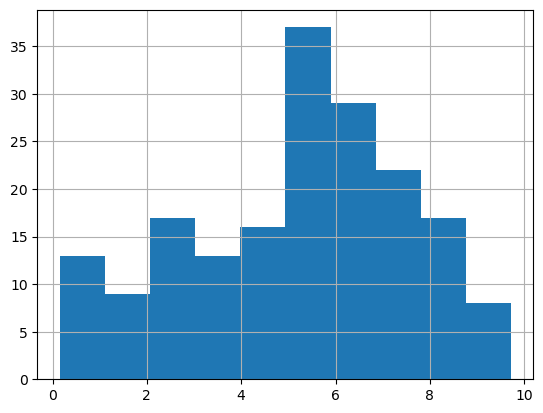

In [268]:
theMap.Total_minMax.hist()

This plot tells you the distribution of the values, but not the presence of outliers, which you are revealed in a boxplot:

<Axes: >

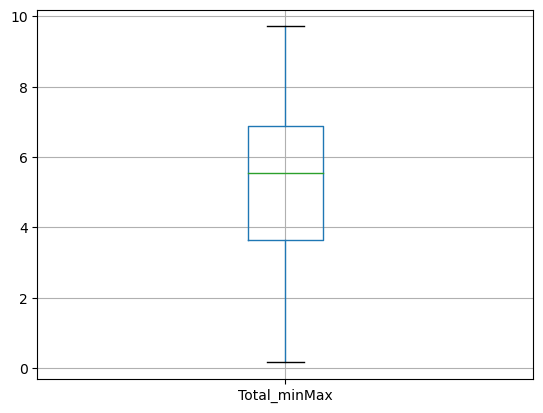

In [269]:
theMap.boxplot(column=['Total_minMax'])  

Notice the histogram divides the data in intervals which are the base of the bars. Seaborn uses the [Freedman-Diaconis](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule) formula to compute the bins.

Let's see other possibilities, but please install [**numba**](https://numba.readthedocs.io/en/stable/user/installing.html) before runing the next code; also make sure you have **pysal**, **mapclassify** and **numpy** installed: 

In [270]:
import mapclassify 
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMap.Total_minMax
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts                                
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data 
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K) 

Let's see the **HeadTailBreaks** results:

In [271]:
# a frequency table by default
ht

HeadTailBreaks

  Interval     Count
--------------------
[0.16, 5.22] |    77
(5.22, 6.89] |    59
(6.89, 8.03] |    24
(8.03, 8.74] |    12
(8.74, 9.34] |     4
(9.34, 9.57] |     2
(9.57, 9.66] |     2
(9.66, 9.72] |     1

In [272]:
# group label
ht.yb

array([2, 1, 0, 3, 0, 0, 0, 5, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 1,
       0, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 6, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 3, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 2,
       0, 2, 1, 2, 1, 1, 5, 0, 0, 0, 6, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1,
       3, 0, 2, 0, 4, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1, 4, 1,
       3, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 3, 0, 0, 0, 2, 0, 2,
       0, 0, 3, 1, 1, 0, 1, 0, 2, 0, 0, 0, 3, 7, 0, 0, 0, 1, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 3, 1, 0, 1, 1, 4, 1, 1, 0, 4, 0, 0, 3, 1, 0, 1, 1,
       3, 1, 1, 1, 2])

In [273]:
# labels and counts
np.unique(ht.yb,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([77, 59, 24, 12,  4,  2,  2,  1]))

In [274]:
# ht.yb into a pandas Series

pd.Series(ht.yb).value_counts()

0    77
1    59
2    24
3    12
4     4
5     2
6     2
7     1
Name: count, dtype: int64

In [275]:
# these are the cuts, but the min value is not including 
ht.bins

array([5.21858445, 6.88884768, 8.02883654, 8.73554122, 9.34027546,
       9.57145718, 9.65956879, 9.71964488])

In [276]:
# completing the bins
HT_bins=list(ht.bins)
HT_bins.insert(0,theVar.min())

<Axes: >

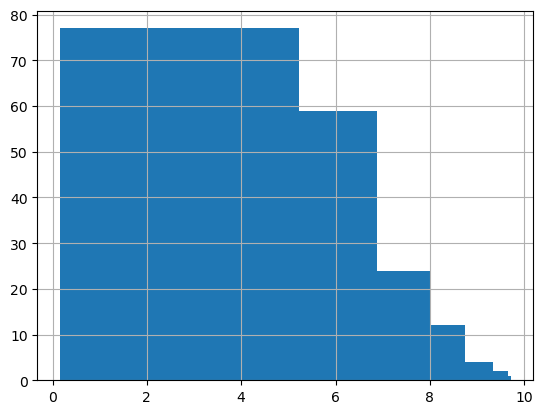

In [277]:
theMap.Total_minMax.hist(bins=HT_bins)

How can we select the right classification?
Let me use the the Absolute deviation around class median (ADCM) to make the comparisson:

In [278]:
class5 = q5, ei5,msd, ht, mb5, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

Now, plot the **adcms**:

<Axes: ylabel='Classifier'>

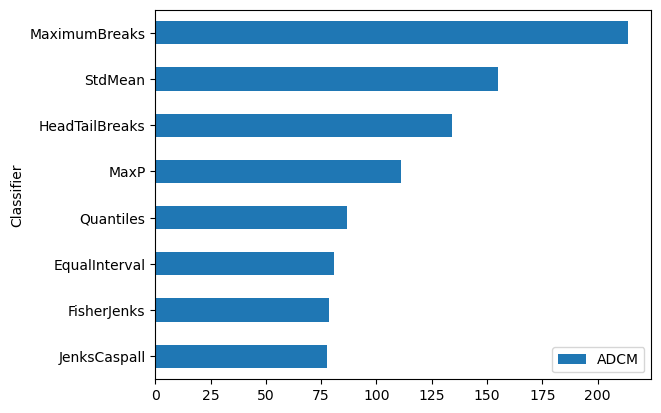

In [279]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

Let me keep the three best options:

In [280]:
theMap['Total_ei5'] = ei5.yb
theMap['Total_fj5'] = fj5.yb
theMap['Total_jc5'] = jc5.yb

# we have:
theMap[['Total_ei5','Total_fj5','Total_jc5']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Total_ei5  181 non-null    int64
 1   Total_fj5  181 non-null    int64
 2   Total_jc5  181 non-null    int64
dtypes: int64(3)
memory usage: 4.4 KB


This is how many countries we have per class, in each scheme:

In [281]:
class5new = ei5,fj5, jc5
pd.DataFrame(
    {c.name: c.counts for c in class5new},
    index=['Class-{}'.format(i) for i in range(5)]
)

,EqualInterval,FisherJenks,JenksCaspall
Class-0,22,24,24
Class-1,30,36,38
Class-2,53,50,45
Class-3,51,44,39
Class-4,25,27,35


Let's plot _Total_ei5_:

/Users/JoseManuel/opt/anaconda3/envs/SpatialDS_311_pandas2/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


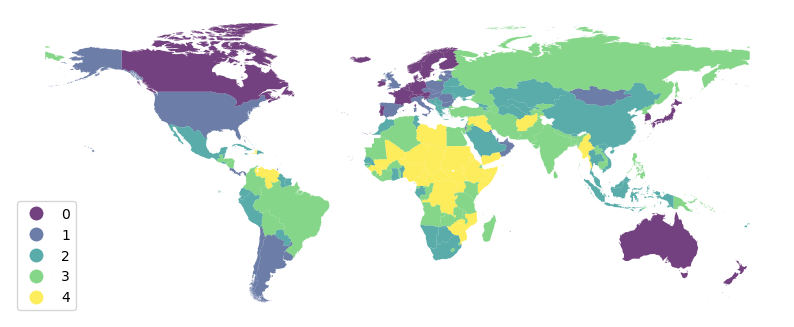

In [282]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMap.plot(column='Total_ei5', 
        cmap='viridis', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

Let's plot all the schemes:

In [283]:
# learn "enumerate()":
varsToPlot = ['Total_ei5','Total_fj5','Total_jc5']
[x for x in enumerate(varsToPlot)]

[(0, 'Total_ei5'), (1, 'Total_fj5'), (2, 'Total_jc5')]

/Users/JoseManuel/opt/anaconda3/envs/SpatialDS_311_pandas2/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/Users/JoseManuel/opt/anaconda3/envs/SpatialDS_311_pandas2/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/Users/JoseManuel/opt/anaconda3/envs/SpatialDS_311_pandas2/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


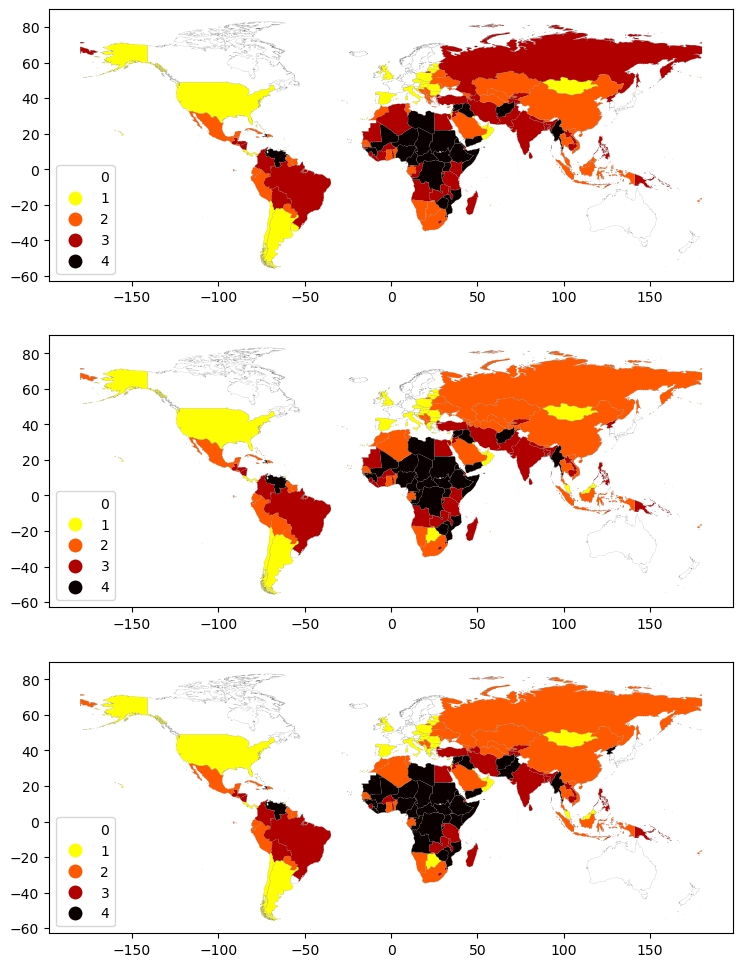

In [284]:
# create 3 figures
f, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

axs = axs.flatten() # just a one dimensional index

for i, col in enumerate(varsToPlot):    
    HERE = axs[i]# select the axis where the map will go
    theMap.plot(column=col, categorical=True, linewidth=0.1,
                legend=True,cmap='hot_r',edgecolor='grey',
                legend_kwds={'loc':3},
                ax=HERE)
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

The values 0 to 4 may not be very informative, we could change that this way:

In [285]:
theMap.loc[:,['Total_ei5','Total_fj5','Total_jc5']]

,Total_ei5,Total_fj5,Total_jc5
0,4,4,4
1,2,2,2
2,0,0,0
3,4,4,4
4,1,1,1
...,...,...,...
176,4,4,4
177,3,3,3
178,3,3,3
179,3,2,3


In [298]:
changes={0:"0_Very_Good", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Very_Bad"}
theMap.loc[:,['Total_ei5','Total_fj5','Total_jc5']].replace(to_replace=changes)

,Total_ei5,Total_fj5,Total_jc5
0,4_Very_Bad,4_Very_Bad,4_Very_Bad
1,2_Middle,2_Middle,2_Middle
2,0_Very_Good,0_Very_Good,0_Very_Good
3,4_Very_Bad,4_Very_Bad,4_Very_Bad
4,1_Good,1_Good,1_Good
...,...,...,...
176,4_Very_Bad,4_Very_Bad,4_Very_Bad
177,3_Bad,3_Bad,3_Bad
178,3_Bad,3_Bad,3_Bad
179,3_Bad,2_Middle,3_Bad


In [299]:
theMap[['Total_ei5_cat','Total_fj5_cat','Total_jc5_cat']]=theMap.loc[:,['Total_ei5','Total_fj5','Total_jc5']].replace(to_replace=changes)

In [300]:
# saving
theMap.to_file(os.path.join("maps","worlMapData.gpkg"), layer='countries', driver="GPKG")

Let's keep one continent:

In [301]:
theMap.continent.value_counts()

continent
Africa      54
Asia        49
Europe      40
Americas    31
Oceania      7
Name: count, dtype: int64

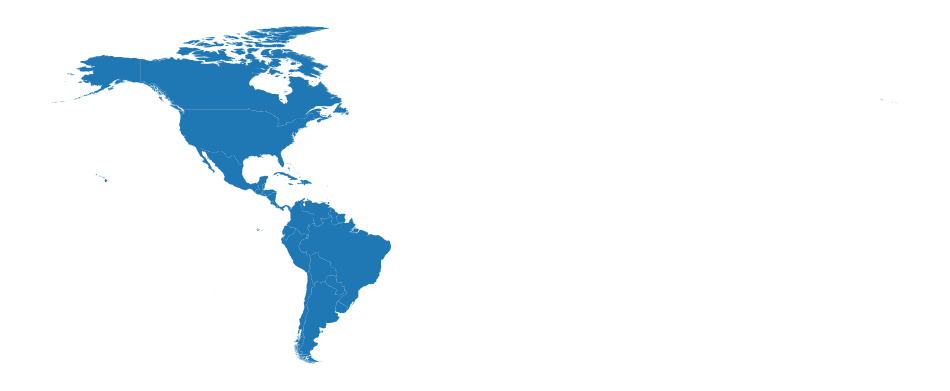

In [302]:
americaMap=theMap[theMap.continent=='Americas']

f, ax = plt.subplots(1, figsize=(12, 8))
americaMap.plot(ax=ax)

ax.set_axis_off()

In [303]:
# is projected

americaMap.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [304]:
# reprojecting
americaMap=americaMap.to_crs(8858)

Let's request the centroid of every country:

In [305]:
americaMap['centroid']=americaMap.geometry.centroid
americaMap.head()

,geo_point_2d,iso3,status,color_code,name,continent,region,iso_3166_1_alpha_2_codes,french_short,geometry,...,iso2,NumericCode,internet,Total_ei5,Total_fj5,Total_jc5,Total_ei5_cat,Total_fj5_cat,Total_jc5_cat,centroid
17,"{'lon': -77.31901136197915, 'lat': 18.15141876...",JAM,Member State,JAM,Jamaica,Americas,Caribbean,JM,Jamaïque,"POLYGON ((1150486.398 2354474.930, 1155049.676...",...,JM,388,.jm,2,2,2,2_Middle,2_Middle,2_Middle,POINT (1186118.394 2312525.035)
20,"{'lon': -88.68476698323005, 'lat': 17.21766625...",BLZ,Member State,BLZ,Belize,Americas,Central America,BZ,Belize,"MULTIPOLYGON (((204376.903 2222002.747, 203211...",...,BZ,084,.bz,2,2,2,2_Middle,2_Middle,2_Middle,POINT (123248.202 2195134.155)
22,"{'lon': -98.26532943367175, 'lat': 61.39201724...",CAN,Member State,CAN,Canada,Americas,Northern America,CA,Canada,"MULTIPOLYGON (((1905553.324 5426213.598, 19047...",...,CA,124,.ca,0,0,0,0_Very_Good,0_Very_Good,0_Very_Good,POINT (-536429.027 6740137.098)
25,"{'lon': -90.35624226813961, 'lat': 15.70213512...",GTM,Member State,GTM,Guatemala,Americas,Central America,GT,Guatemala,"POLYGON ((80326.332 2270894.434, 80320.898 225...",...,GT,320,.gt,3,3,3,3_Bad,3_Bad,3_Bad,POINT (-33690.629 2003955.395)
27,"{'lon': -55.91182643362298, 'lat': 4.126394638...",SUR,Member State,SUR,Suriname,Americas,South America,SR,Suriname,"POLYGON ((3425748.325 686575.069, 3425377.699 ...",...,SR,740,.sr,2,2,2,2_Middle,2_Middle,2_Middle,POINT (3261381.737 529755.690)


In [306]:
americaMap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 31 entries, 17 to 169
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   geo_point_2d                    31 non-null     object  
 1   iso3                            31 non-null     object  
 2   status                          31 non-null     object  
 3   color_code                      31 non-null     object  
 4   name                            31 non-null     object  
 5   continent                       31 non-null     object  
 6   region                          31 non-null     object  
 7   iso_3166_1_alpha_2_codes        31 non-null     object  
 8   french_short                    31 non-null     object  
 9   geometry                        31 non-null     geometry
 10  Country                         31 non-null     object  
 11  Total                           31 non-null     float64 
 12  C1_SecurityApparatu

/Users/JoseManuel/opt/anaconda3/envs/SpatialDS_311_pandas2/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

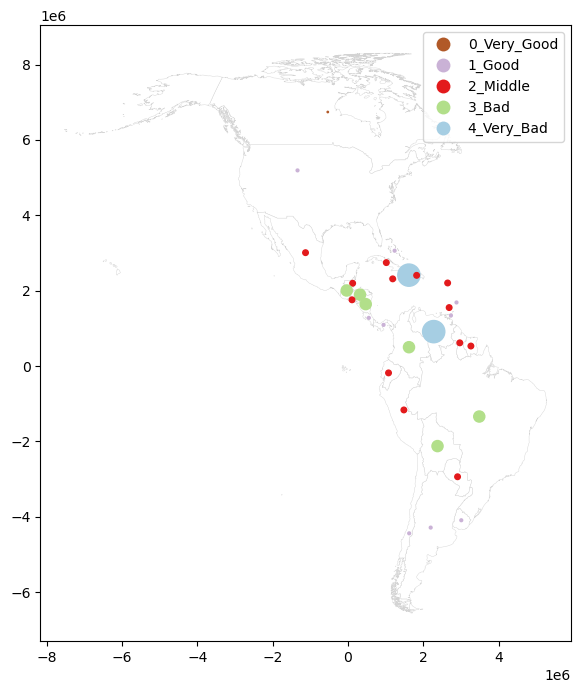

In [307]:
# just the plot
base=americaMap.plot(facecolor='white',
                     edgecolor='lightgrey',
                     linewidth=0.3,
                     figsize=(8,8))

# another column, with the size of the POINTS (based on "Total_ei5")
americaMap["sizeOfMarker_ei5"]=[4**exp for exp in americaMap["Total_ei5"]]

# now, plotting the centroids (declared as the geometry)!!!
americaMap.set_geometry("centroid").plot(column="Total_ei5_cat",
                                         categorical=True,
                                         markersize=americaMap["sizeOfMarker_ei5"],
                                         cmap='Paired_r',
                                         legend=True,ax=base)

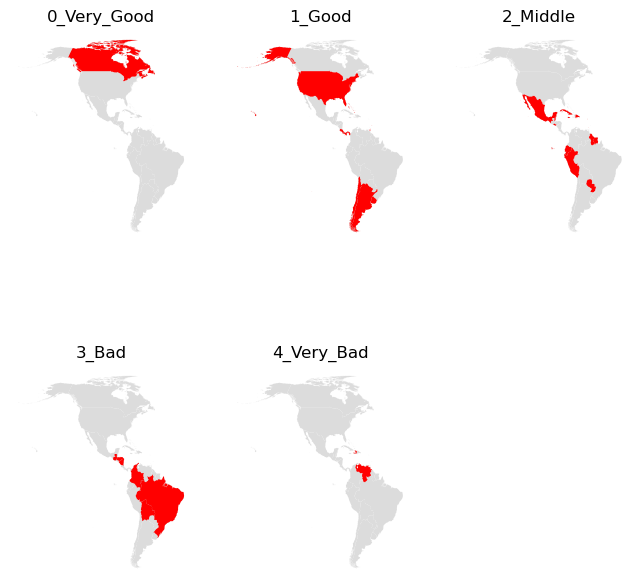

In [309]:
# facetting
f, axs = plt.subplots(nrows=2, ncols=3, figsize=(8, 8))
axs = axs.flatten()

for i in range(5):  
    ax = axs[i]# select the axis where the map will go
    americaMap.plot(ax=ax,color='gainsboro')
    americaMap[americaMap.Total_ei5==i].plot(ax=ax,color='red')
    ax.set_axis_off()
    ax.set_title(changes[i])
f.delaxes(axs[5]) # bye empty subplot
plt.show()